# Women&Children First

## Table of Contents
1. [**Introduction**](#1)
    - Objective/Purpose
    - Key Questions Addressed
    - Assumptions/Methodology/Scope
    - Leaderboard Observation
    - Project Objective Clarification
    - Conclusion
2. [**Acquiring and Loading Data**](#2)
	- Acquiring Data
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
    - Conclusion
3. [**Data Preprocessing**](#3)
    - Dropping out-of-scope columns
    - Feature Engineering / Transformation to obtain the Title column from Name
    - Handling Missing Values in Age
    - Drop Redundant Columns
    - Passenger Group Categorization and Refinement: Preprocessing for Survival Analysis
    - Age cutoff for children onboard the titanic
    - Understanding Variability in Histogram Granularity: Square Root vs. Freedman-Diaconis Rule
    - Survival Analysis by Title and Age Groups
    - Visualization of Survival Rates by Title Categories and Ages
    - Conclusion

  
4. [**Analysis of Passenger Categories**](#4)
   
   
   - Exploring `passenger Titles`
   - Consolidating Passenger Categories: "Women and Children" for Enhanced Analysis
 

 
   - Quantitative Validation of Evacuation Prioritization

   - Results Explanation
   - Conclusion

5. [**Conclusion**](#5)
    - Conclusion
    - Insights
    - Suggestions
    - Possible next steps
 

---

# 1


# Chapter 1: Introduction

#### Project Description

This section aims to provide a concise yet comprehensive overview of the project's primary objectives and methods.

## Objective Clarification

The primary objective of this project is to conduct a meticulous exploration of the Titanic dataset. The core focus lies in empirically examining the historical principle of "women and children first" rather than creating a generic survival prediction model.

### Key Questions Addressed

- **Survival Rates of Women and Children:** Investigate and analyze survival rates among women and children to validate the widely discussed "women and children first" principle during the Titanic disaster.

- **Age Classification and Survival Chances:** Explore age-based distinctions to define 'children' during the Titanic disaster. Assess whether toddlers had a higher chance of survival compared to other children.
Got it, let's refine the section based on the content of your report:

## Assumptions, Methodology, and Scope

### Assumptions in Historical Context

The assumptions underlying this study are deeply rooted in historical narratives surrounding the Titanic disaster. These assumptions encompass the existence and application of the "women and children first" protocol during the evacuation, a prevalent societal norm at that time. Additionally, historical records indicate that the definition of "children" during the Titanic era typically included individuals under the age of 14, establishing an age-based criterion for our analysis.

### Methodology Emphasis

The methodology employed in this research involves a multifaceted approach. Feature engineering plays a crucial role in the extraction of significant information from the 'Name' column, leading to the creation of categorical variables like 'Title' that shed light on the social status and potential prioritization of passengers. Additionally, the handling of missing data, particularly in the 'Age' column, involves a nuanced approach. Imputations based on titles and other features aid in maintaining data integrity for subsequent analysis.

Furthermore, the analysis extends beyond basic statistical measures. Utilizing logistic regression and hypothesis testing methods, this study aims to discern correlations and statistically significant patterns within the dataset. These regression models will quantify the impact of various categorical variables, especially titles like 'women_and_mothers' and 'children,' on survival probabilities, validating historical presumptions.

### Scope Expansion

The study's outcomes go beyond immediate research goals. The findings not only contribute to confirming or debunking historical accounts but also hold potential implications for disaster management strategies. By providing insights into demographic prioritization during crises, this research could inform modern emergency protocols.

The exclusion of certain columns, such as 'Cabin' and 'Embarked,' from the analysis is a strategic decision. Their limited relevance to the research objectives and their potential to introduce noise into the analysis justify their exclusion, allowing a more focused examination of pertinent variables.

Would you like any further adjustments or additions based on the content of your report?

## Leaderboard Observation and Data Description

Observing the leaderboard's trend displaying high accuracy rates, particularly with over 300 entries reporting 100% accuracy, raises pertinent concerns. Such trends may arise from external data sources or a marked instance of overfitting, demanding critical evaluation during analysis.

### **Project Objective Clarification:**

The project refrains from merely predicting general survival rates aboard the Titanic. Instead, it aims to rigorously scrutinize the famous adage "women and children first" through specific scenarios within the dataset.


### Conclusion

The preliminary investigation presented in this chapter sets the stage for a comprehensive exploration of the Titanic dataset. By examining survival rates among women, children of various age groups, and addressing historical assumptions, the subsequent chapters will delve deeper into these aspects to uncover insights into the disaster's dynamics.


---

# 2

# Chapter 2: Acquiring and Loading Data

## Acquiring Data
- **Library Import:** Importing essential libraries like Pandas, NumPy, Matplotlib, and Seaborn for data manipulation, visualization, and analysis.
- **Notebook Setup:** Configuring settings and preferences for visualizations and Pandas display options.
- **Data Loading:** Loading the Titanic dataset using Pandas from a CSV file to initiate our analysis.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import string
import re 
from skimpy import skim, generate_test_data
plt.style.use('ggplot')


---
## Loading and Initial Exploration
- **Data Display:** Displaying the first few rows of the dataset and reordering columns for better visualization.
- **Specific Passenger Investigation:** A specific investigation into a passenger's details (Masabumi Hosono) to add historical context to the analysis.
- **Data Type Inspection:** Checking data types within columns to ensure they are appropriate for analysis.
- **Missing Data Analysis:** Identifying missing values in different columns to strategize their handling.
- **Duplicate Row Assessment:** Checking for entirely duplicated rows within the dataset.
- **Data Uniqueness Evaluation:** Examining the percentage similarity of values in columns to understand the variability of data.

In [5]:
# Data manipulation
import datetime
import pandas.api.types as ptypes
from skimpy import skim, clean_columns

# Visualizations
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.2f}'.format

# Visualization settings (preference)
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

In [6]:
# # Load DataFrame
datacsv=pd.read_csv('titanic/train.csv')
df=datacsv

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


---
## Basic Data Exploration

In [6]:
# # Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

Rows count: 891
Columns count: 12


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [8]:
print (list(df.columns.values))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [9]:
#re arranging the columns to have our (feature vector + label) + as a preference
cols=list(df.columns.values)
df=df[[cols[0]]+cols[2:13]+[cols[1]]]
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,1


In [30]:
# sad story about a survivor who was shamed by the press and goverment for his survival of the tragedy. 
# source: https://en.wikipedia.org/wiki/Masabumi_Hosono
shame = df['Name'].str.contains('Masabumi', case=False)
result = df[shame]
result



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
288,289,2,"Hosono, Mr. Masabumi",male,42.00,0,0,237798,13.00,NaN,S,1


### Check Data Types

In [10]:
# # Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check Missing Data

In [11]:
# # Print percentage of missing values
missing_percent = df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
  print(missing_percent[missing_percent > 0] * 100)
else:
  print('None')

---- Percentage of Missing Values (%) -----
Cabin      77.10
Age        19.87
Embarked    0.22
dtype: float64


- **Percentage of Missing Values:**

The 'Cabin' and 'Embarked' columns, with missing values of 77.10% and 0.22%, respectively, lie outside the scope of our current investigation into 'women and children first.' As for the 'Age' column (19.87% missing), addressing these missing values is crucial for our forthcoming analysis related to age-based groupings and survival probabilities. 


#### Check for Duplicate Rows

In [12]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# # Show duplicated rows
df[df.duplicated()]

No. of entirely duplicated rows: 0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


#### Check Uniqueness of Data

In [13]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----',num_unique)
#print(100/num_unique)

---- Percentage Similarity of Values (%) ----- Sex              2
Survived         2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64


---

### Initial Observations and Next Steps
- **Summary Statistics:** Gathering summary statistics and initial observations to guide further data preprocessing and analysis.
- **Data Quality Evaluation:** Assessing missing values, duplicates, and data uniqueness to plan necessary data handling strategies.


## Conclusion

Chapter 2 sets the stage for comprehensive data understanding and initial exploration. The forthcoming chapter will focus on data preprocessing and feature engineering, refining the dataset for deeper analysis into survival patterns among women, children, and other demographic groups aboard the Titanic.

---

# 3

# Chapter 3: Data Preprocessing



## Dropping Out-of-Scope Columns
The initial section focuses on refining the dataset by removing columns that are not pertinent to our primary research question. Columns such as 'Ticket,' 'Fare,' 'Cabin,' and 'Embarked' are deemed out-of-scope and hence dropped from the dataset. This process streamlines the dataset to only include relevant columns essential for our analysis.

In [14]:
# Dropping multiple out of scope columns at once
columns_to_drop = ['Ticket', 'Fare', 'Cabin', 'Embarked']
inscope_df = df.drop(columns=columns_to_drop).copy()
inscope_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,0
...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.00,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,0
889,890,1,"Behr, Mr. Karl Howell",male,26.00,0,0,1


---
## Feature Engineering: Title Extraction and Age Grouping
The feature engineering section starts with extracting titles from the 'Name' column using predefined title lists. It creates a new 'Title' column in the dataset based on the titles extracted from passenger names. Additionally, the function `categorize_titles()` groups titles into specific categories like 'child,' 'mother,' and 'non-priority' based on predefined criteria.

In [15]:
# Function to extract titles from a big string
def substrings_in_string(big_string, substrings):#big is the name and sub is the titles within the name
    for substring in substrings:#for title in x
        if big_string.find(substring) != -1:
            return substring
    return np.nan


title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms',
              'Mlle', 'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer'] #the main titles that are present

# Map titles to the "Name" column
inscope_df['Title'] = inscope_df['Name'].apply(lambda x: substrings_in_string(x, title_list))
print(inscope_df)
# Function to replace titles
def categorize_titles(title):
    child = ["Master","Miss","Mlle"]
    mother = ["Mrs", "Mme"]
    
    if title in child :
        return "child"
    elif title in mother:
        return "mother"
    else:
        return "non_priority" 

# Apply the replace_titles function
inscope_df['Title'] = inscope_df['Title'].apply(lambda x: categorize_titles(x))

     PassengerId  Pclass                                                 Name  \
0              1       3                              Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)   
2              3       3                               Heikkinen, Miss. Laina   
3              4       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                             Allen, Mr. William Henry   
..           ...     ...                                                  ...   
886          887       2                                Montvila, Rev. Juozas   
887          888       1                         Graham, Miss. Margaret Edith   
888          889       3             Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                                Behr, Mr. Karl Howell   
890          891       3                                  Dooley, Mr. Patrick   

        Sex   Age  SibSp  P

---
## Passenger Group Categorization and Refinement

In the process of data preprocessing, we adopted an iterative approach, adjusting and validating our assumptions as we progressed. Initially, we categorized passengers based on their titles, creating distinct groups for 'non-priority,' 'mother,' 'child,' and 'woman.' We refined these groupings by correcting discrepancies found within specific categories. For instance, we reclassified single women aged 14 and above from the 'child' category to 'woman.' Additionally, we observed anomalies within the 'mother' category, where some individuals had no children or parents listed. We rectified this inconsistency by reassigning these cases to the 'woman' category. Moreover, travelers journeying alone, both males and females, were considered 'non-priority' and "woman" respectively.

This preprocessing step allowed us to define meaningful groups based on titles, setting the stage for subsequent analysis regarding survival rates among distinct passenger groups.








In [19]:
inscope_df["Title"].unique()

array(['non_priority', 'mother', 'child'], dtype=object)

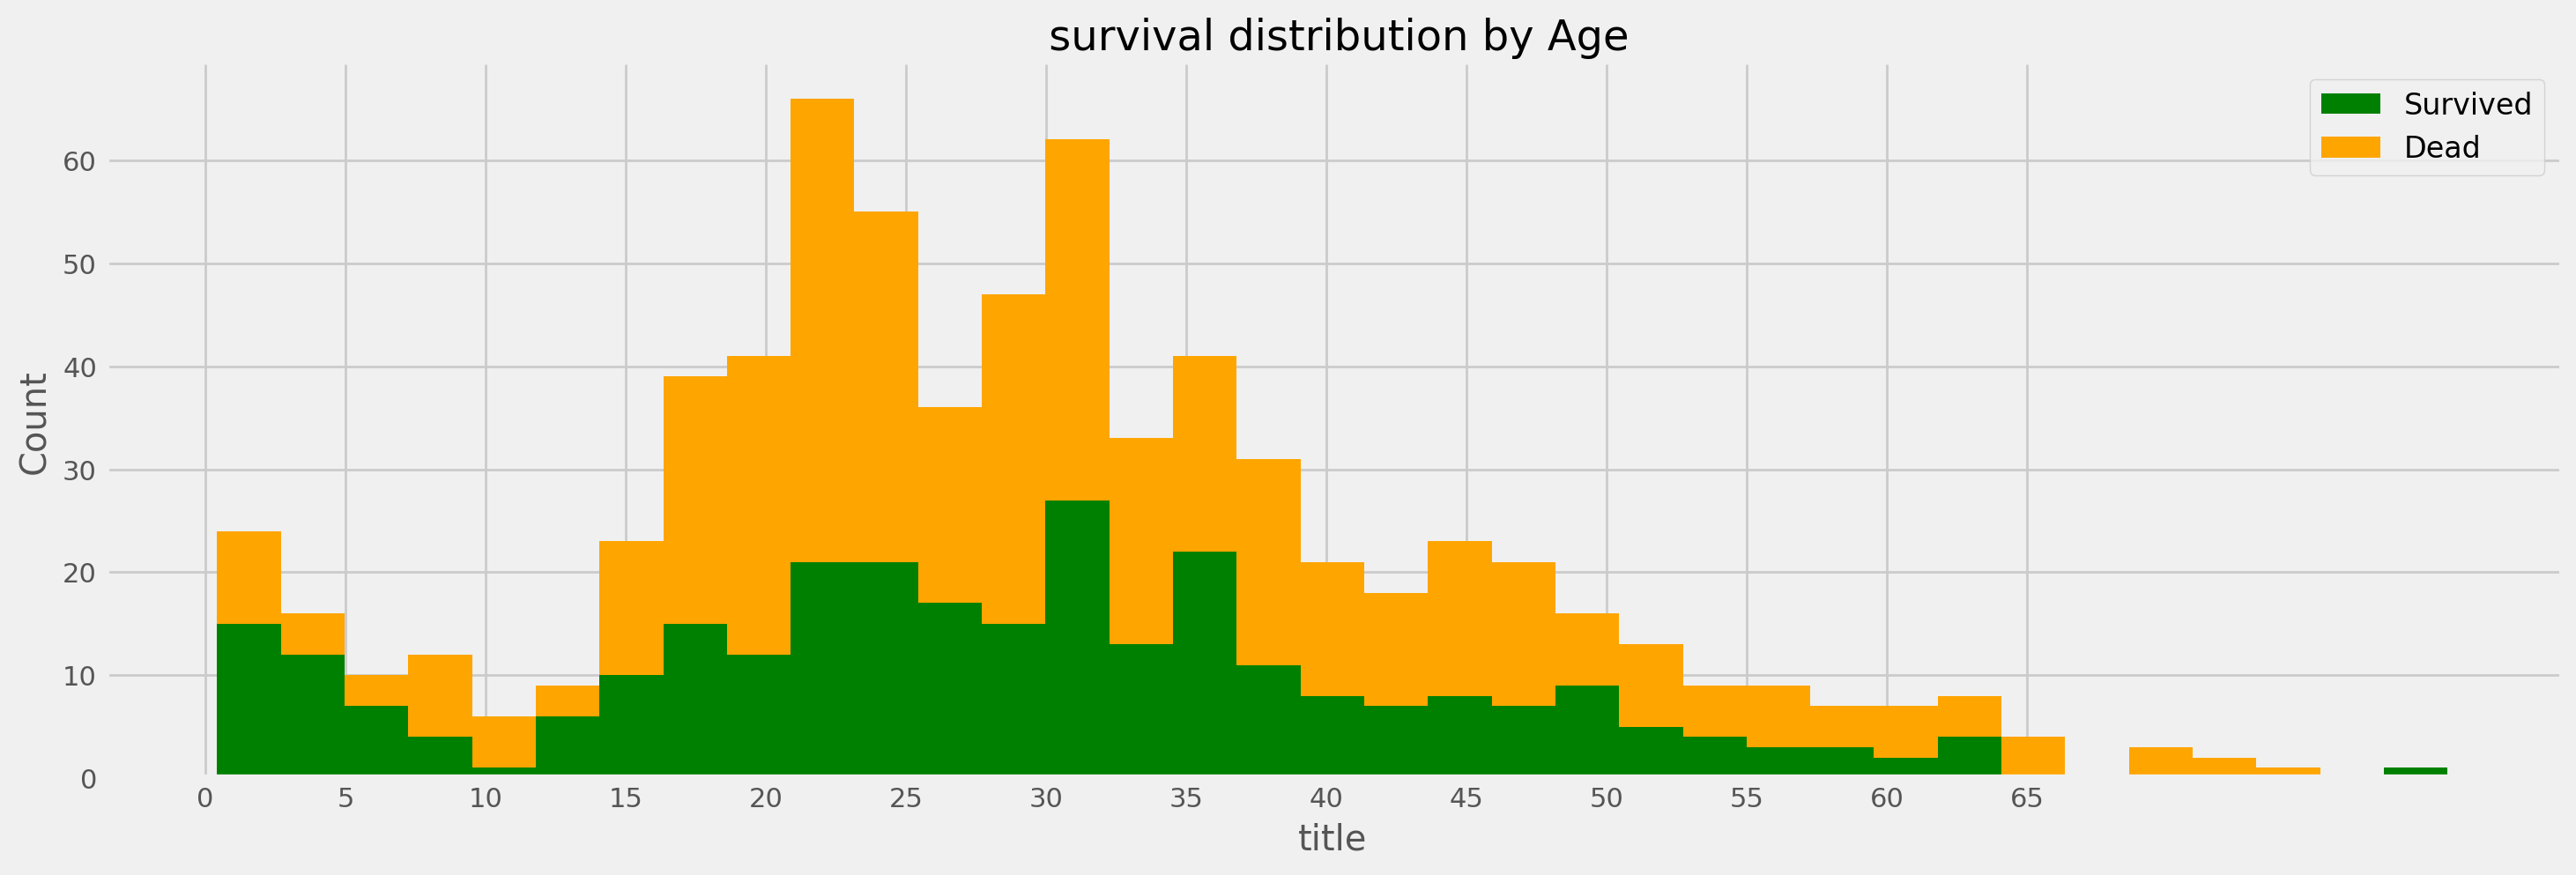

In [22]:
#histogram01  survival based on age
survived_passenger= inscope_df[(inscope_df['Survived'] == 1)]['Age']
deceased_passenger = inscope_df[(inscope_df['Survived'] == 0)]['Age']

plt.hist([survived_passenger,deceased_passenger], bins=35, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title(" survival distribution by Age")
plt.xticks(range(0,70,5))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()

---
## Understanding Variability in Histogram Granularity: Square Root vs. Freedman-Diaconis Rule
Histograms serve as powerful tools in visually representing data distributions. Two common methods used to determine the number of bins in a histogram— the Square Root and Freedman-Diaconis rules—offer differing approaches to defining granularity and visual detail.

The Square Root Rule operates on a simple heuristic, calculating the number of bins as the square root of the total number of data points. This straightforward method often provides histograms with more pronounced features, as each bin represents a subset of the data, offering clearer distinctions between data groups.

In contrast, the Freedman-Diaconis Rule adapts bin width to the dataset's variability, considering the interquartile range (IQR) and data size to determine bin width and subsequently, the number of bins. While aiming to capture the data's variability, this method can sometimes yield broader or more generalized histograms.

During our analysis of the Titanic dataset, we observed that the Square Root Rule generated histograms with heightened definition, showcasing distinct features within the age distributions of survivors and deceased passengers. Conversely, the Freedman-Diaconis Rule resulted in histograms with less defined boundaries, offering a more generalized view of the age distribution.

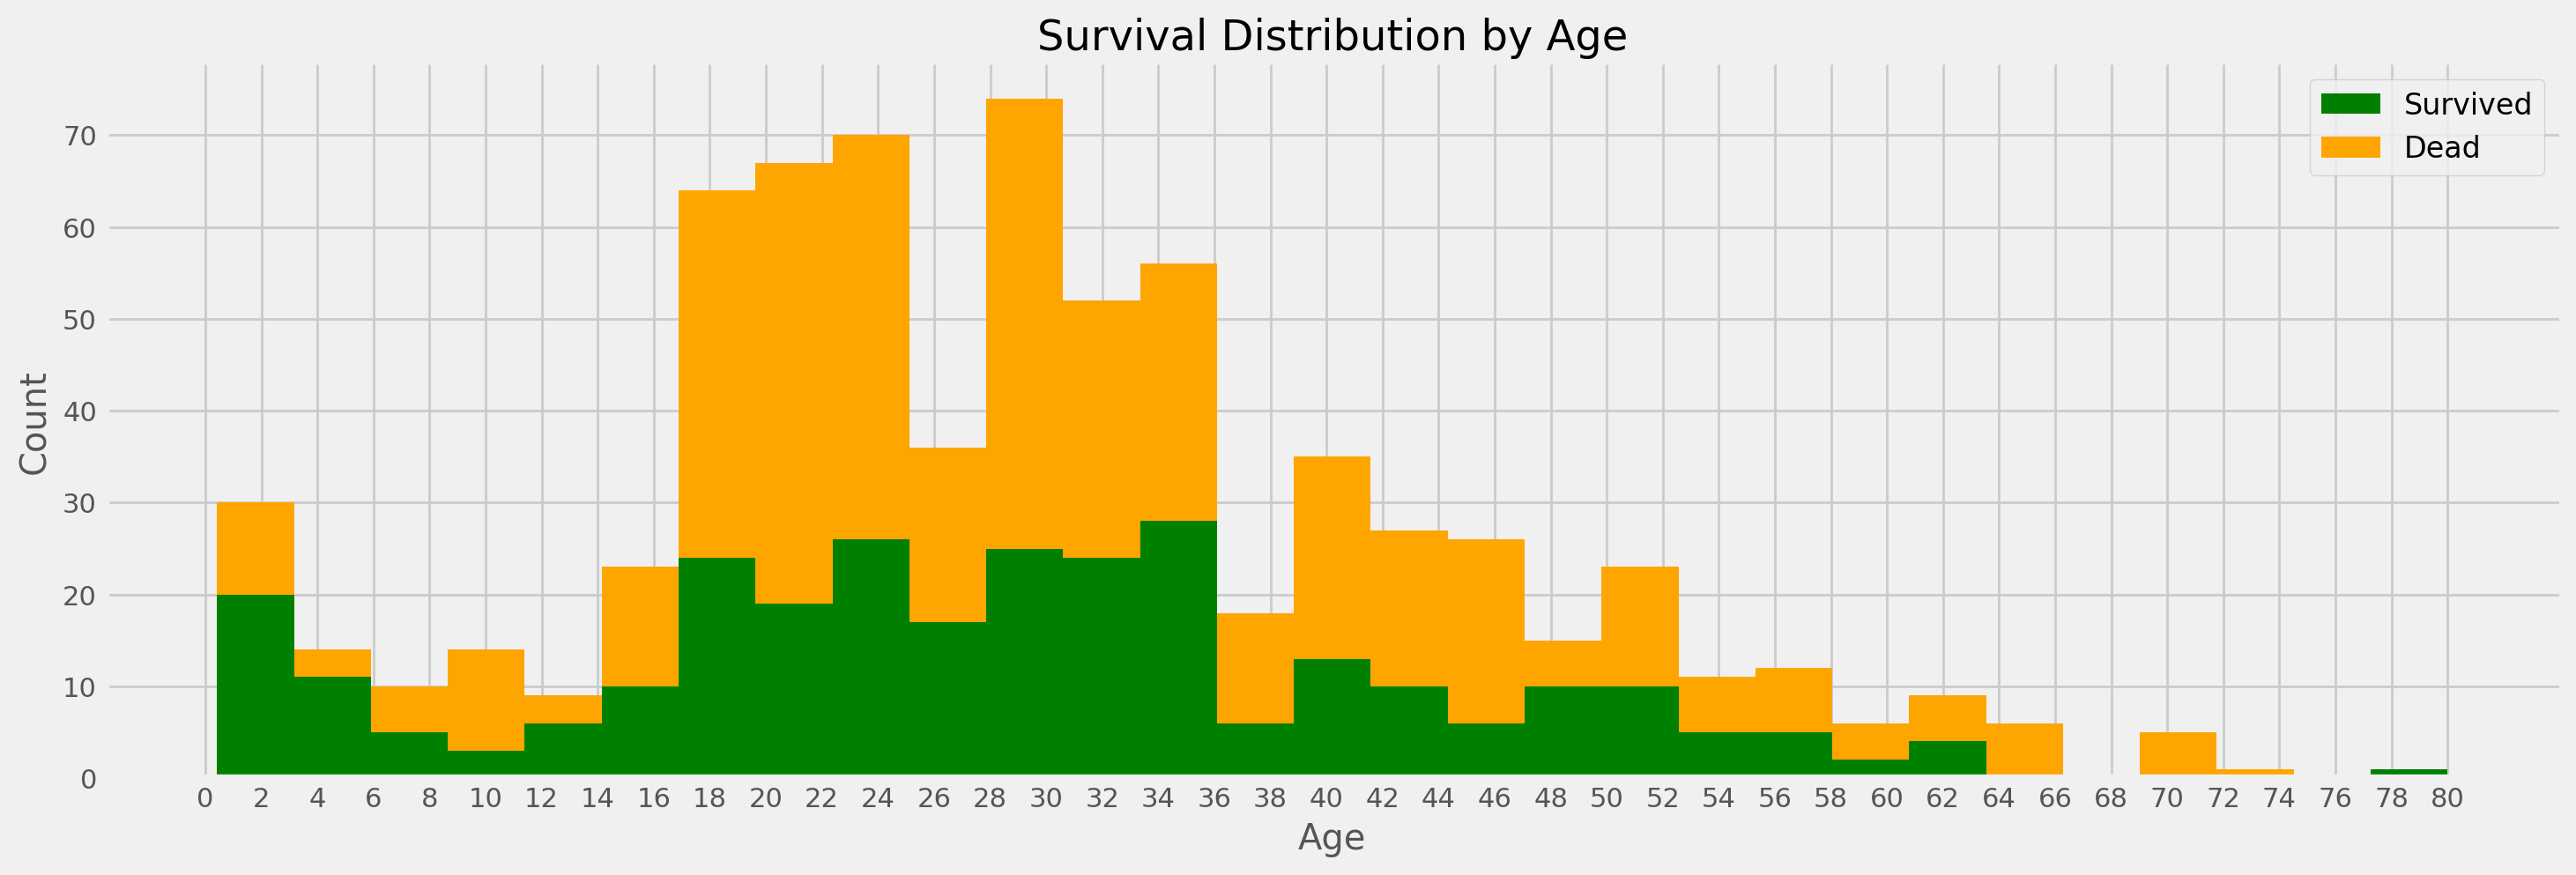

In [32]:
from numpy import sqrt 

# Calculate minimum and maximum age in the dataset
min_age = inscope_df['Age'].min()
max_age = inscope_df['Age'].max()

# Calculate the range of ages to determine the bin size
age_range = max_age - min_age

# Determine the number of bins using a reasonable rule (e.g., square root or Freedman-Diaconis rule)
#num_bins = int(age_range**0.5)  # Square root method (adjust as needed)
num_bins =int(sqrt(len(inscope_df))) # Square root method (adjust as needed)

# Generate x-axis ticks based on the age range and selected bin size
x_ticks = range(int(min_age), int(max_age) + 1, int(age_range / num_bins))

# Plotting survival distribution by age with updated xticks and number of bins
plt.hist([survived_passenger, deceased_passenger], bins=num_bins, stacked=True, color=['green', 'orange'], label=['Survived', 'Dead'])
plt.title("Survival Distribution by Age")
plt.xticks(x_ticks)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


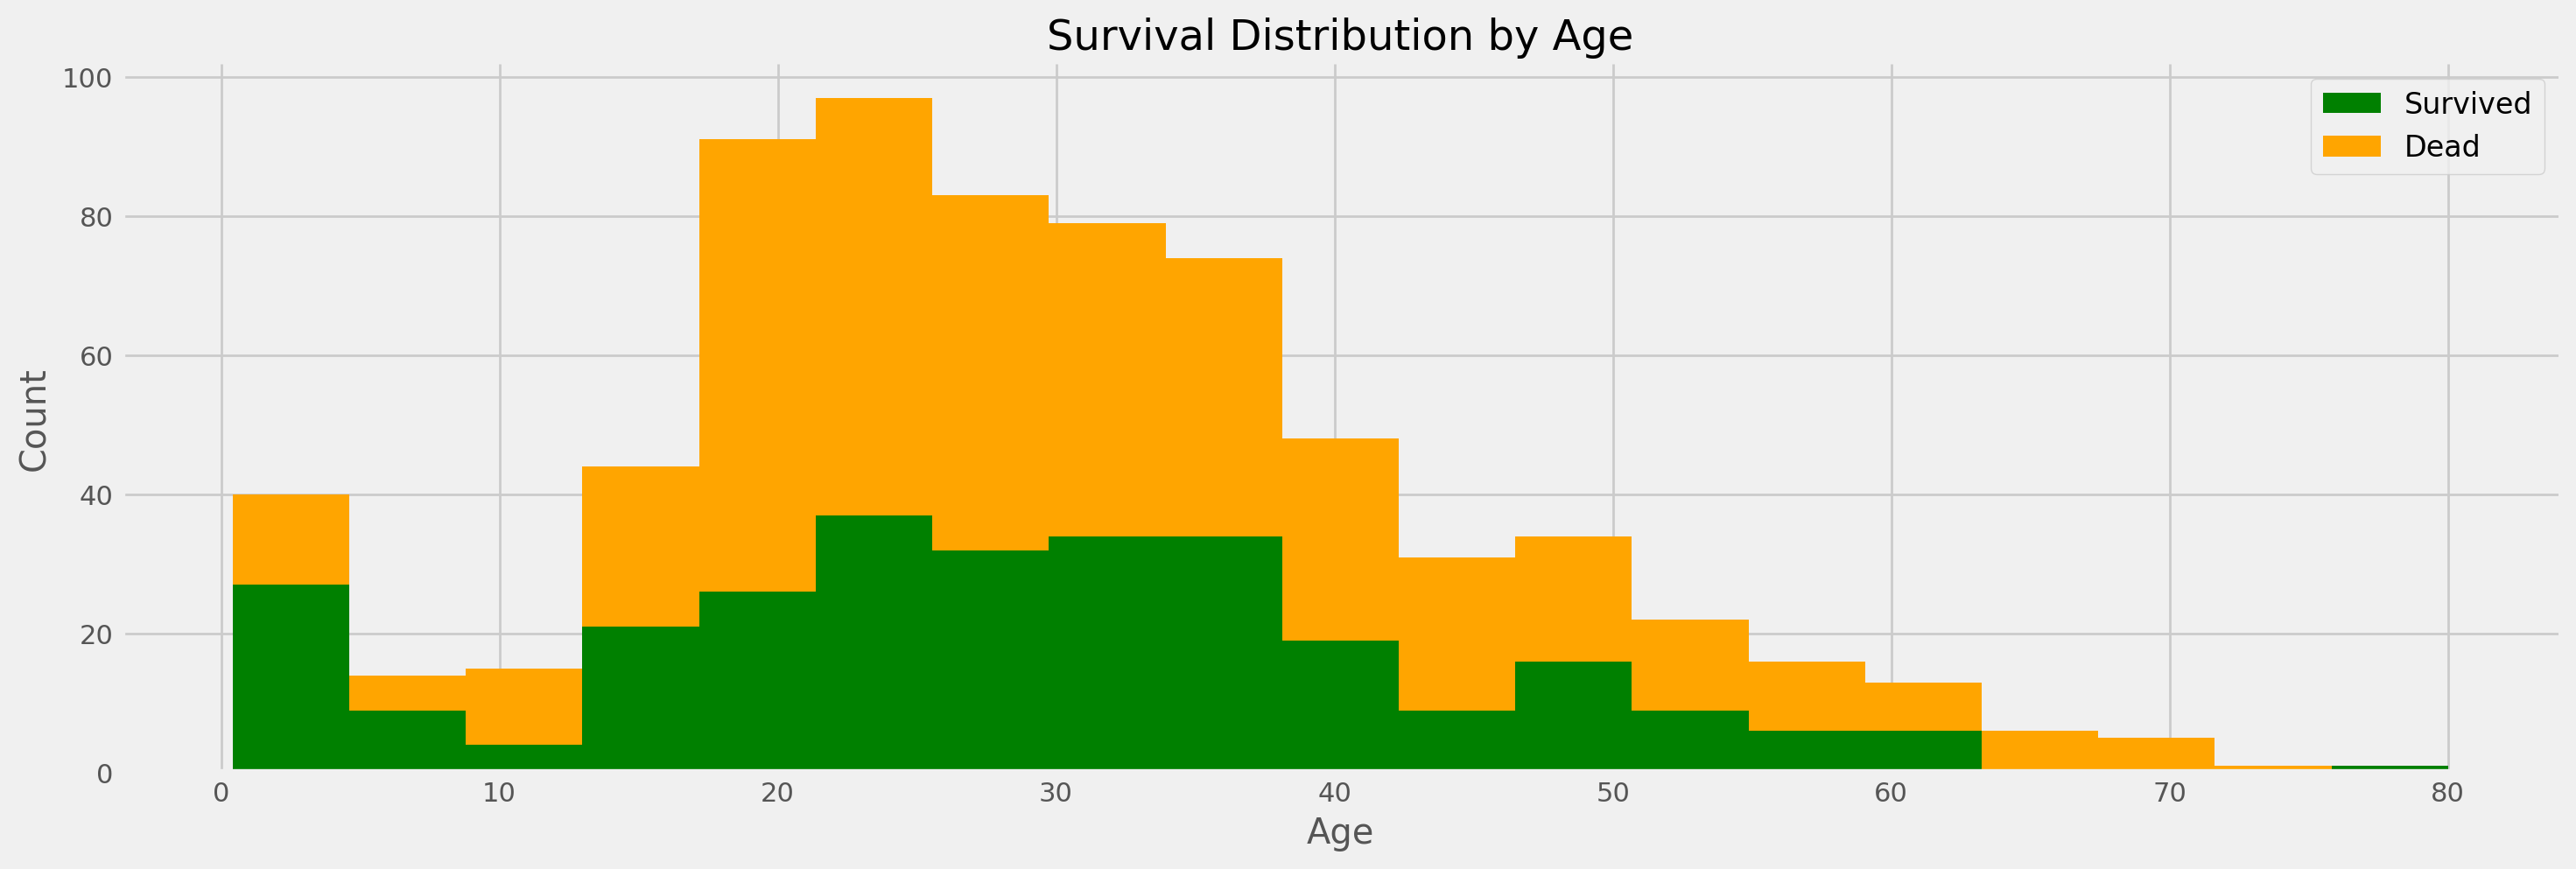

Freedman-Diaconis bin width: 3.999846351912101
Number of bins: 19


In [34]:

# Extracting age data for survived and deceased passengers, without modifying the original DataFrame
survived_passenger = inscope_df[inscope_df['Survived'] == 1]['Age']
deceased_passenger = inscope_df[inscope_df['Survived'] == 0]['Age']

# Create copies of the subsets and drop NaN values for calculation and visualization
survived_passenger_clean = survived_passenger.copy().dropna()
deceased_passenger_clean = deceased_passenger.copy().dropna()

# Combine both cleaned age data for calculation
all_passengers = pd.concat([survived_passenger_clean, deceased_passenger_clean])

# Calculate interquartile range (IQR), ignoring NaN values
Q1 = np.nanpercentile(all_passengers, 25)  # 25th percentile (lower quartile)
Q3 = np.nanpercentile(all_passengers, 75)  # 75th percentile (upper quartile)
IQR = Q3 - Q1  # Interquartile Range

# Calculate number of data points
num_data_points = len(all_passengers)

# Calculate Freedman-Diaconis bin width
bin_width = 2 * IQR / (num_data_points ** (1/3))

# Calculate number of bins using the range and bin width
min_age = all_passengers.min()
max_age = all_passengers.max()
data_range = max_age - min_age
num_bins = int(data_range / bin_width)

# Plotting survival distribution by age with updated number of bins
plt.hist([survived_passenger_clean, deceased_passenger_clean], bins=num_bins, stacked=True, color=['green', 'orange'], label=['Survived', 'Dead'])
plt.title("Survival Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

print("Freedman-Diaconis bin width:", bin_width)
print("Number of bins:", num_bins)

---
## Survival Analysis by Title and Age Groups
After refining the title categories, the analysis shifts towards exploring survival rates among different title groups based on age. Visualizations such as histograms and bar plots are used to display survival distributions, shedding light on how survival rates vary across different title categories and age ranges. These plots offer insights into potential prioritization trends in rescue efforts and survival dynamics across different age groups.

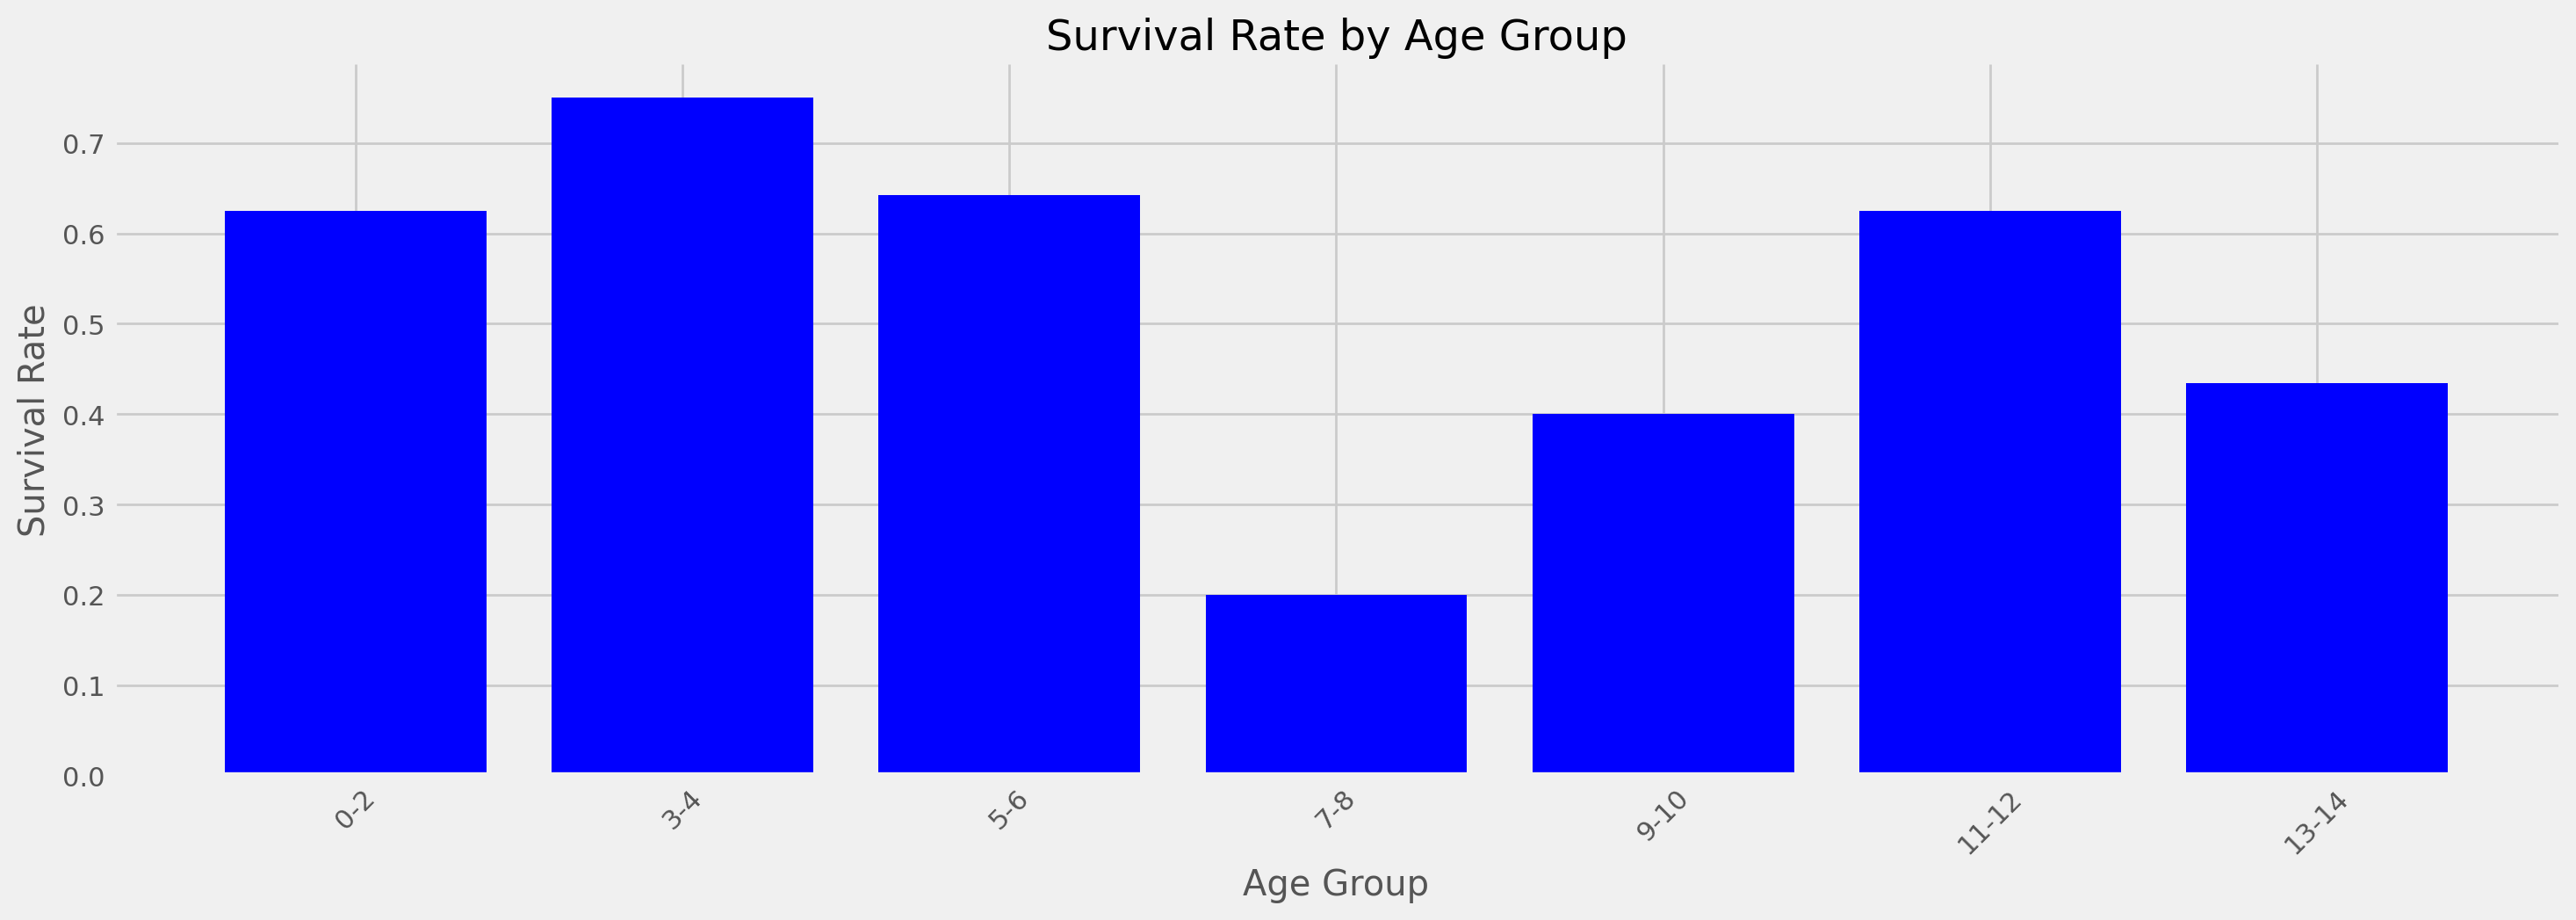

In [74]:

# Filter out missing values in 'Age' column
isccop=inscope_df.copy()
isccop = isccop.dropna(subset=['Age'])

# Define age bins (only including children to teens)
age_bins = [0, 2, 4, 8, 10, 12, 14, 16]  # Define age groups as needed

# Create labels for the age bins
age_labels = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14']

# Cut the data into age bins and add a new column 'AgeGroup'
isccop['AgeGroup'] = pd.cut(isccop['Age'], bins=age_bins, labels=age_labels)

# Calculate survival rates within each age group
survival_rates = isccop.groupby('AgeGroup')['Survived'].mean()

# Plotting the survival rates
plt.bar(age_labels, survival_rates, color='blue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

In examining the revised age groupings, distinct patterns in survival rates emerge within specific age intervals. The delineated age brackets—'Toddler' (0-4), 5-6, and subsequently 9-10, 11-12, 13-14—reveal varying survival probabilities, showcasing intriguing disparities among different age clusters. Notably, the 'Toddler' group exhibits significantly higher survival rates, hinting at a potential prioritization trend in rescue efforts during critical moments for this young age cohort. Conversely, age ranges such as 5-6 and others depict alternative survival dynamics, marking transitions in survival tendencies across childhood. These findings not only emphasize the pivotal role of age in survival outcomes but also prompt a deeper exploration into the underlying factors influencing these distinctive patterns. In our forthcoming analysis, we aim to delve deeper into these refined age-specific trends, exploring complementary variables to unveil a more comprehensive understanding of the nuanced dynamics shaping survival probabilities during critical events.

Including a specific "Toddler" category (0-4) offers a more focused examination of the youngest passengers, potentially revealing more detailed insights into their survival outcomes and the actions taken during the disaster.

In [68]:
#inscope_df.loc[(inscope_df['Age']<6),'Title']='toddler'
#inscope_df[(inscope_df['Title']=='child')&(inscope_df['Age']<6)]
#there are 18 datapoints left of children that do not have an age. to avoid noise, we will drop them
#inscope_df[(inscope_df['Title']=='child')&(inscope_df['Age'].isnull())]
#inscope_df[(inscope_df['Age'].isnull())]
 

In [72]:
# Dropping rows in the original DataFrame where 'Title' is 'child' and 'Age' column is null
inscope_df.drop(inscope_df[(inscope_df['Title'] == 'child') & (inscope_df['Age'].isnull())].index, inplace=True)


In [73]:
inscope_df[(inscope_df['Title']=='child')&(inscope_df['Age'].isnull())]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title


In [75]:
inscope_df['Title'].unique()

array(['non_priority', 'woman', 'child', 'mother'], dtype=object)

In [49]:
#creating "woman" as a title for single women who are above  14 years old ()
inscope_df.loc[(~inscope_df['Age'].isnull()) & #no age
          (inscope_df['Sex'].str.contains('fem', flags=re.I, regex=True)) & #female
          (inscope_df['Title'] == 'child') & (inscope_df['Age'] > 13), 'Title'] = 'woman'#above 13 of age


In [76]:
#checking if there are any women that are under 14

inscope_df[(inscope_df['Title']=='woman')&(inscope_df['Age']<14)&(~inscope_df['Age'].isnull())]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title


In [51]:
#some "mothers" have 0 children or parents

inscope_df[(inscope_df['Title']=='mother')&(inscope_df['Parch']==0)&(~inscope_df['Age'].isnull())]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,1,mother
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,1,mother
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,1,mother
15,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,1,mother
18,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31.00,1,0,0,mother
40,41,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,0,mother
41,42,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27.00,1,0,0,mother
49,50,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,0,mother
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,1,mother
53,54,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)",female,29.00,1,0,1,mother


In [52]:
#correcting the error of mothers with no children/parents
inscope_df.loc[(inscope_df['Title']=='mother')&(inscope_df['Parch']==0),'Title']='woman'
#checking if there are any mothers with no children?
inscope_df[(inscope_df['Title']=='mother')&(inscope_df['Parch']==0)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title


In [78]:
#Adding the toddler title
inscope_df.loc[(inscope_df['Title']=='child')
               &(inscope_df['Age']<5)
               ,'Title']='toddler'
inscope_df[inscope_df['Title']=='toddler']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title
7,8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,0,toddler
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,1,toddler
16,17,3,"Rice, Master. Eugene",male,2.00,4,1,0,toddler
43,44,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,1,toddler
63,64,3,"Skoog, Master. Harald",male,4.00,3,2,0,toddler
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,1,toddler
119,120,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,0,toddler
164,165,3,"Panula, Master. Eino Viljami",male,1.00,4,1,0,toddler
171,172,3,"Rice, Master. Arthur",male,4.00,4,1,0,toddler
172,173,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,1,toddler


#### considering anyone traveling alone as an adult:



In [53]:

inscope_df.loc[(inscope_df['Parch']==0)&(inscope_df['SibSp']==0)&(inscope_df['Sex']=='female'),'Title']='woman'
inscope_df.loc[(inscope_df['Age']<14),'Title']='child'


In [54]:
inscope_df.loc[(inscope_df['Parch']==0)&(inscope_df['SibSp']>0)&(inscope_df['Sex']=='male'),'Title']='non_priority'

In [77]:
inscope_df[(inscope_df['Title']=='mother')]
inscope_df.groupby(['Title']).size()

Title
child            70
mother           56
non_priority    537
woman           210
dtype: int64

In [91]:
inscope_df[inscope_df['Title']=='mother'].sort_values(by='Age').head(57)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,1,mother
608,609,2,"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",female,22.00,1,2,1,mother
323,324,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)",female,22.00,1,1,1,mother
858,859,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,1,mother
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,1,mother
437,438,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,1,mother
394,395,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)",female,24.00,0,2,1,mother
600,601,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)",female,24.00,2,1,1,mother
880,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.00,0,1,1,mother
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,0,mother


In [80]:
inscope_df["Title"].unique()


array(['non_priority', 'woman', 'toddler', 'mother', 'child'],
      dtype=object)

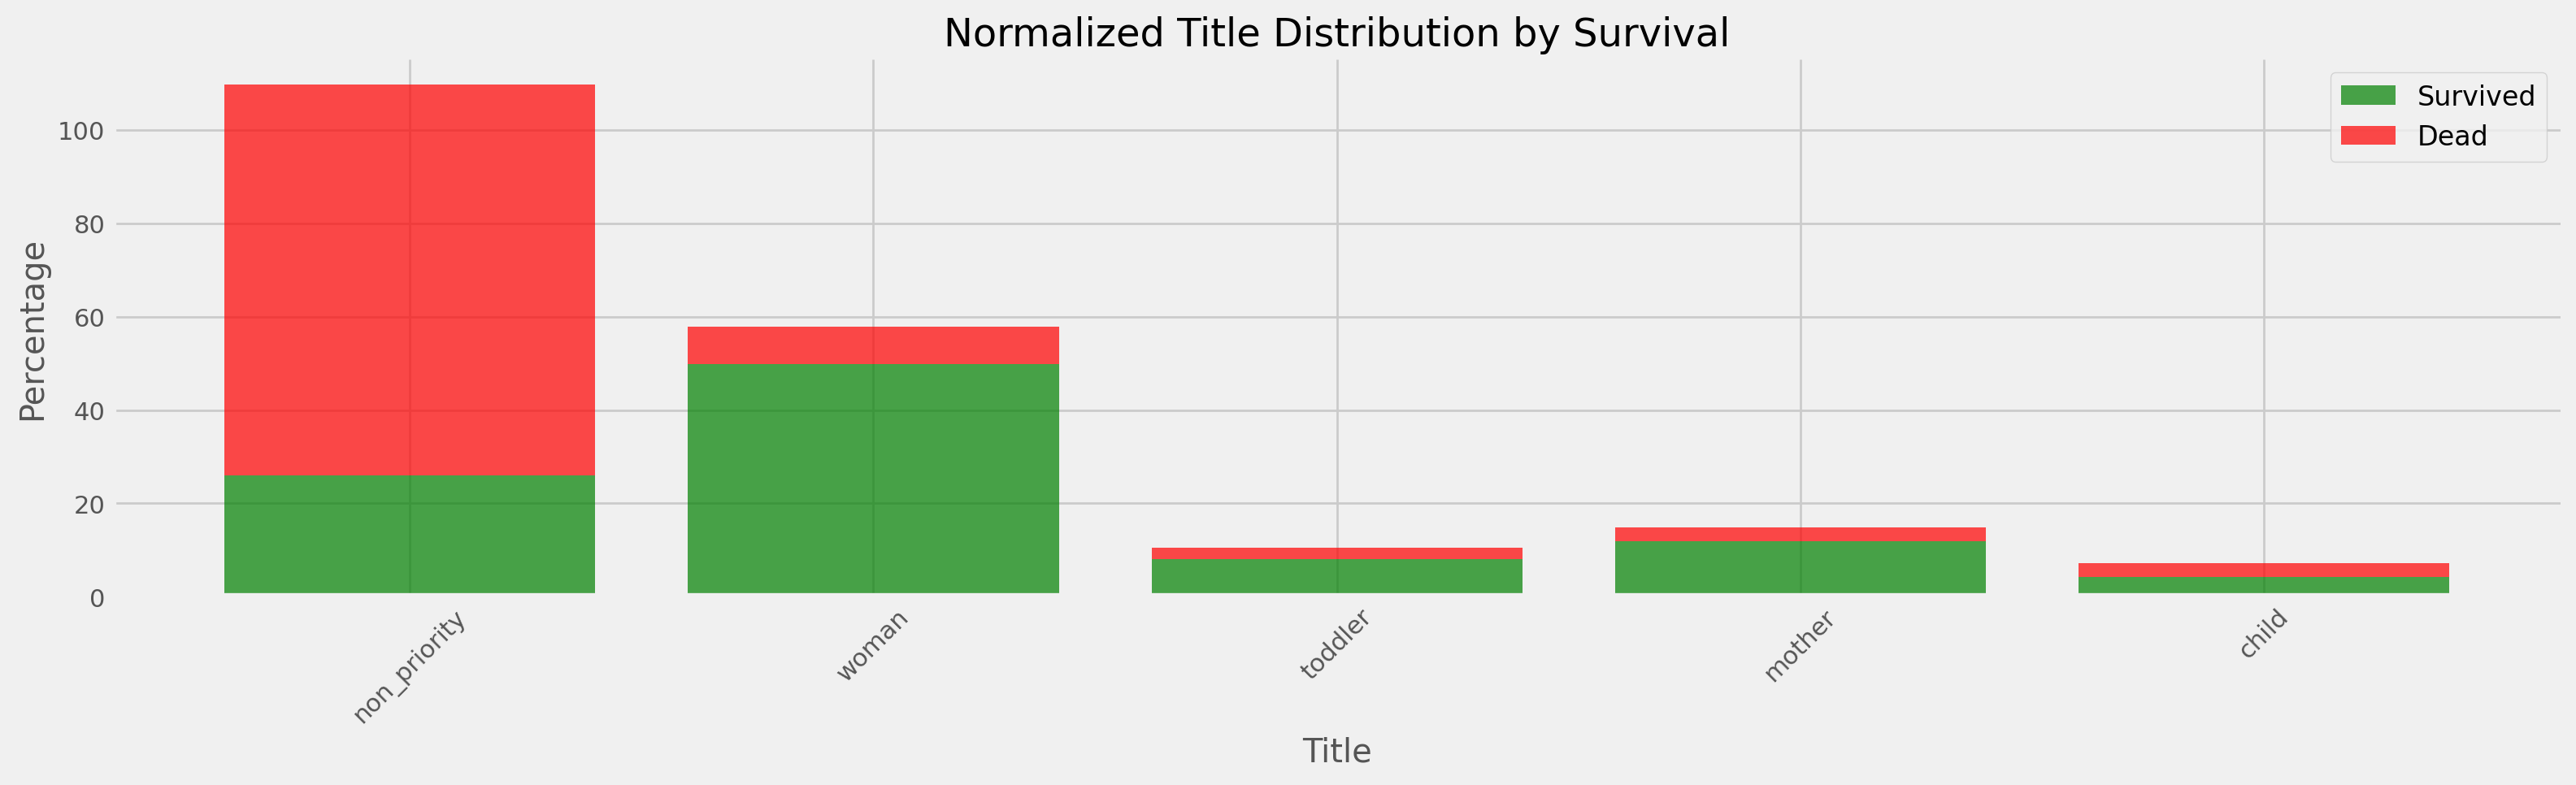

In [83]:


# Counting occurrences of each title for survived and deceased passengers
survived_titles_count = inscope_df[inscope_df['Survived'] == 1]['Title'].value_counts(normalize=True)
deceased_titles_count = inscope_df[inscope_df['Survived'] == 0]['Title'].value_counts(normalize=True)

# Getting a list of all unique titles
all_titles = inscope_df['Title'].unique()

# Creating lists to hold survival and death percentages for each title
survived_percentages = [survived_titles_count.get(title, 0) * 100 for title in all_titles]
deceased_percentages = [deceased_titles_count.get(title, 0) * 100 for title in all_titles]

# Plotting normalized histogram of survival rates based on 'Title'
plt.bar(all_titles, survived_percentages, color='green', alpha=0.7, label='Survived')
plt.bar(all_titles, deceased_percentages, color='red', alpha=0.7, label='Dead', bottom=survived_percentages)
plt.title("Normalized Title Distribution by Survival")
plt.xlabel("Title")
plt.ylabel("Percentage")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Plotting Survival and Death Statistics for Each Title by Age

In this step, we aim to visualize the survival and death counts within each title category against the corresponding ages. By plotting histograms, we'll explore the distribution of survivors and non-survivors across different age groups categorized by titles such as 'Miss,' 'Mrs,' 'Master,' etc. This visualization will shed light on the survival patterns concerning specific age ranges within different title categories, allowing us to understand potential trends or correlations between age, title, and survival status among passengers aboard the Titanic.

Let's proceed by generating histograms that illustrate the distribution of survival outcomes for passengers belonging to different titles categorized by age groups. This analysis will aid in uncovering any notable trends in survival rates among women, children, mothers, and other groups based on their ages during the Titanic disaster.

---

## Visualization of Survival Rates by Title Categories and Ages
Further, visualizations like swarm plots and individual histograms are generated to depict survival rates within specific title categories across different age groups. These visualizations provide a nuanced understanding of survival trends for women, children, mothers, and other groups based on age during the Titanic disaster.

 

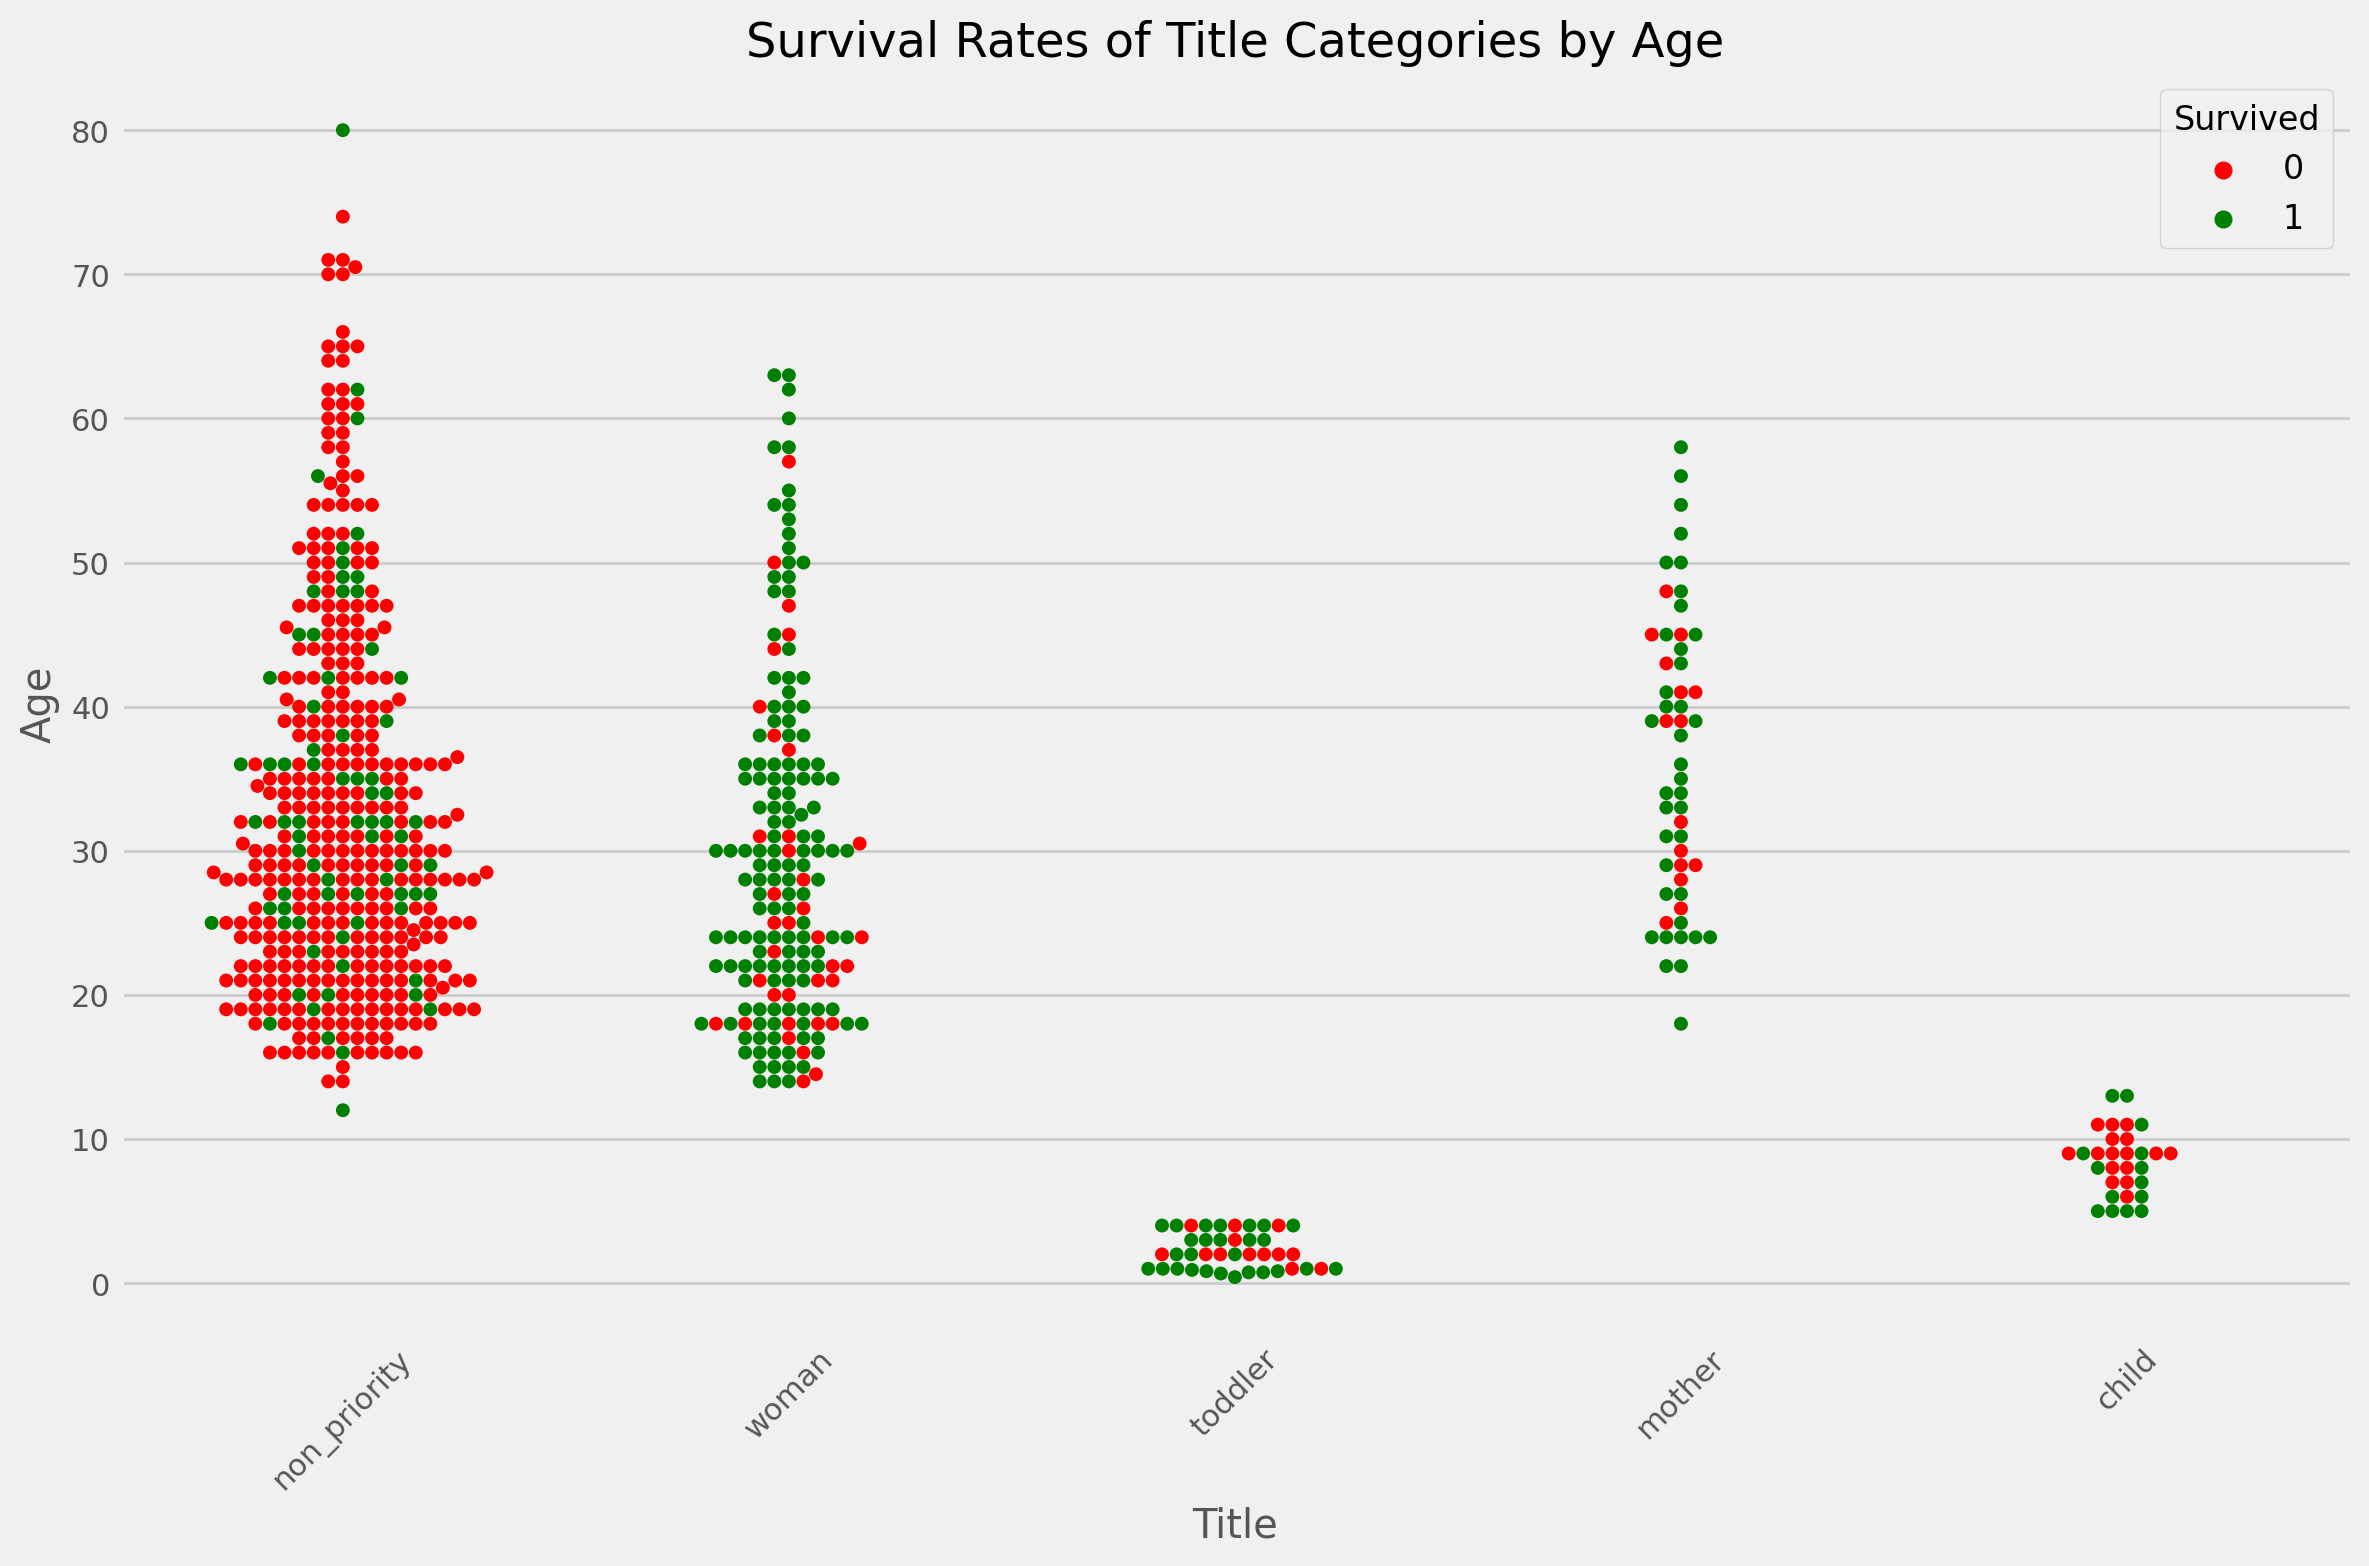

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {1: 'green', 0: 'red'}  # Specify colors for each category

# Creating a swarm plot to visualize survival rates of different title categories by age
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Title', y='Age', hue='Survived', data=inscope_df, palette=custom_palette)
plt.title('Survival Rates of Title Categories by Age')
plt.xlabel('Title')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

custom_palette = {1: 'green', 0: 'red'}  # Specify colors for each category

# Creating a swarm plot to visualize survival rates of different title categories by age
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Title', y='Age', hue='Survived', data=inscope_df, palette=custom_palette)
plt.title('Survival Rates of Title Categories by Age')
plt.xlabel('Title')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

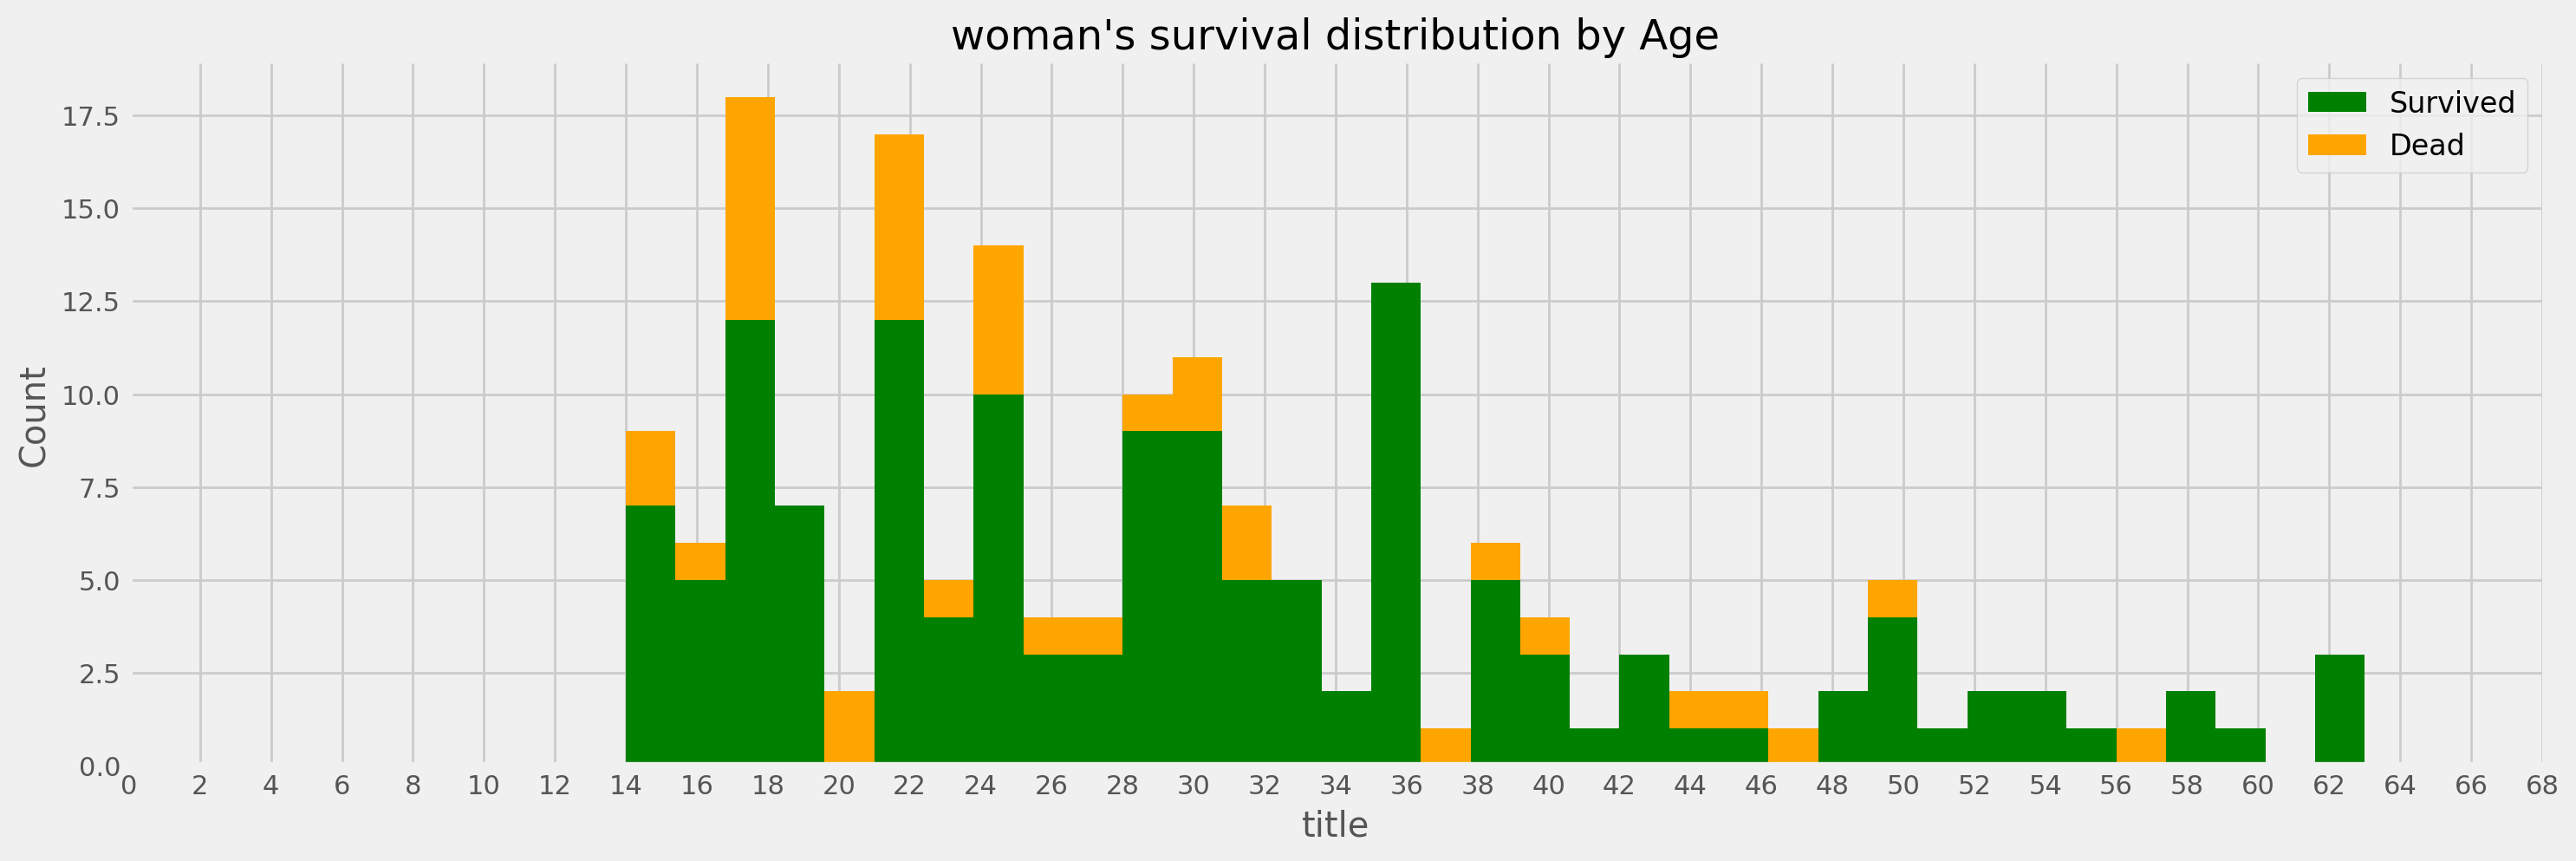

In [122]:
#histogram01: women's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'woman')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'woman')]['Age']

plt.hist([survived_women,deceased_women], bins=35, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("woman's survival distribution by Age")
plt.xticks(range(0,70,2))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()

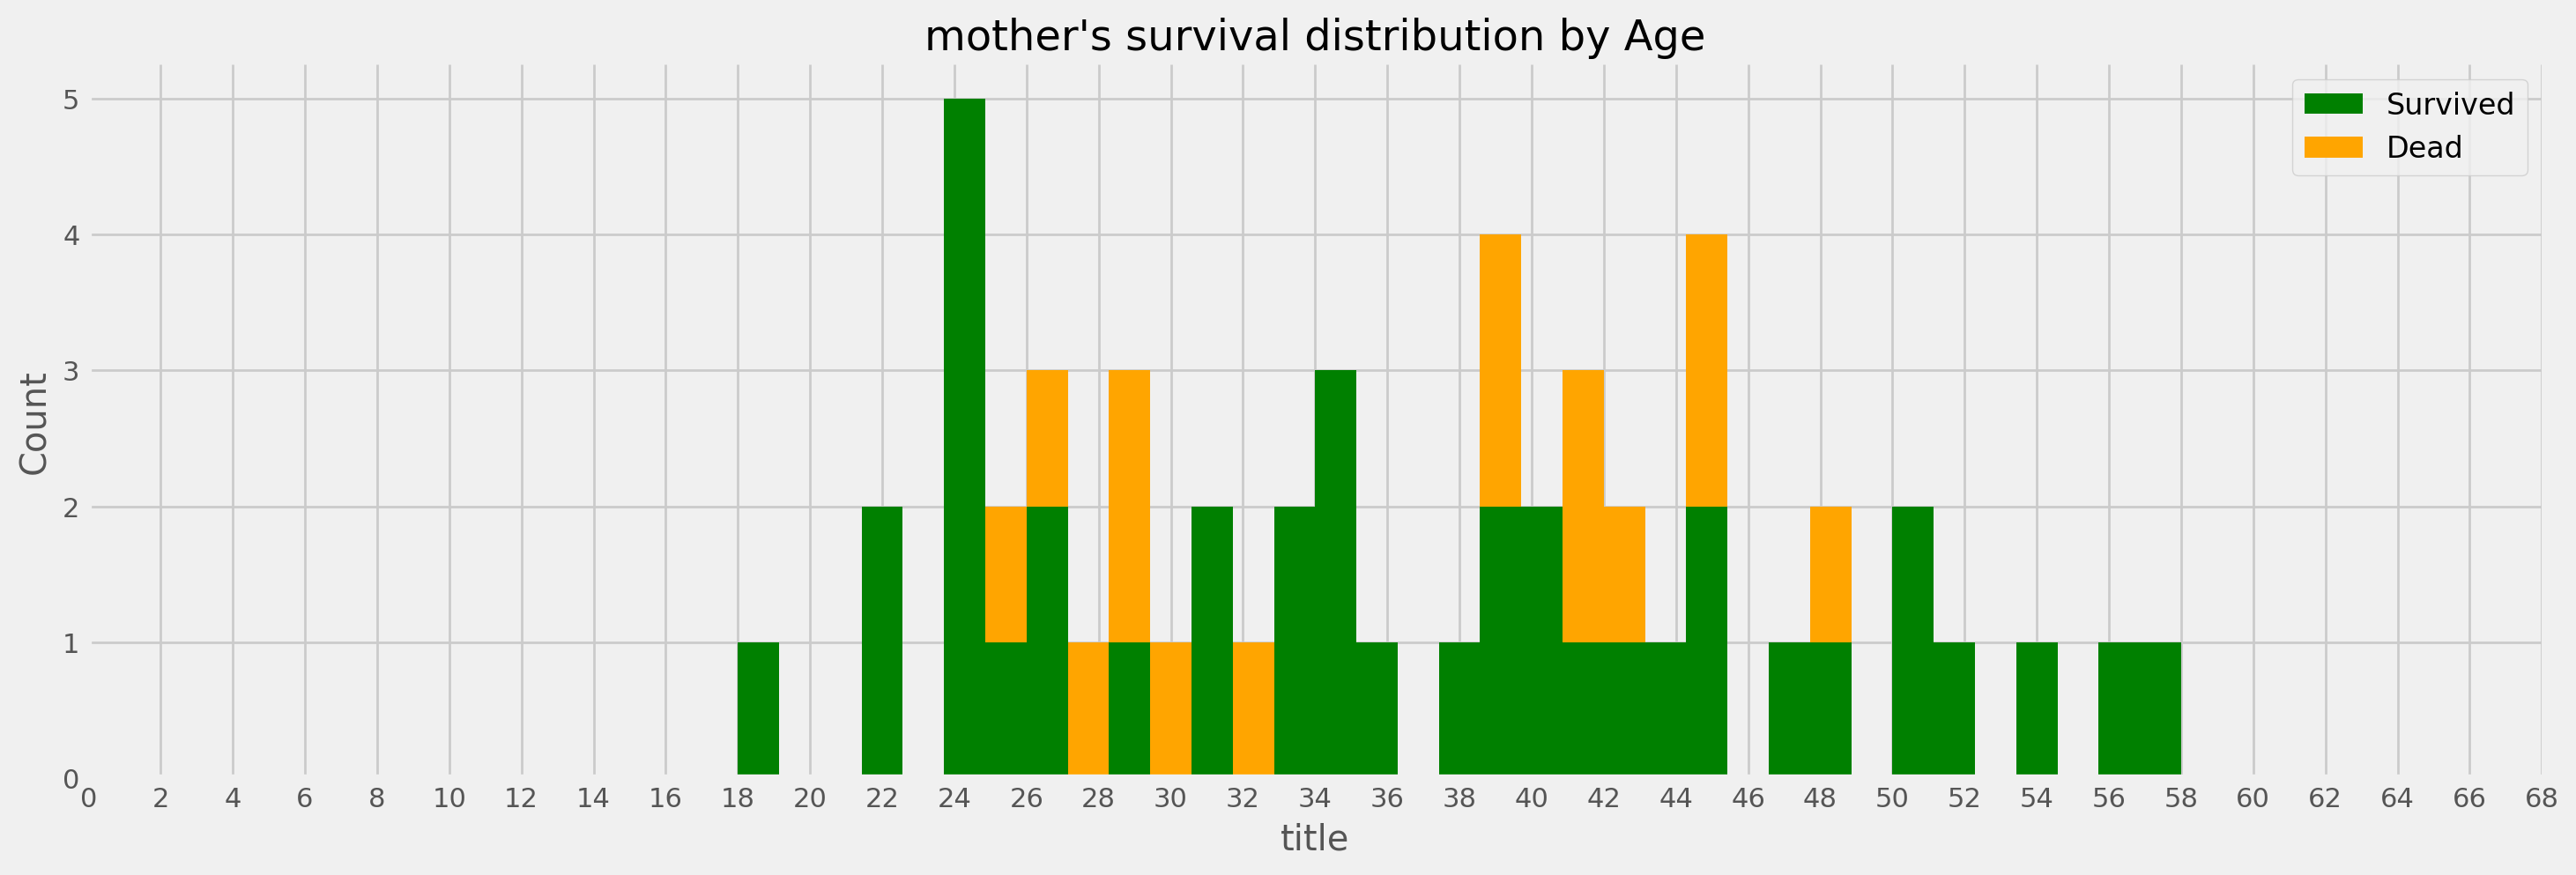

In [127]:
#histogram02: Mother's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'mother')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'mother')]['Age']

plt.hist([survived_women,deceased_women], bins=35, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("mother's survival distribution by Age")
plt.xticks(range(0,70,2))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()


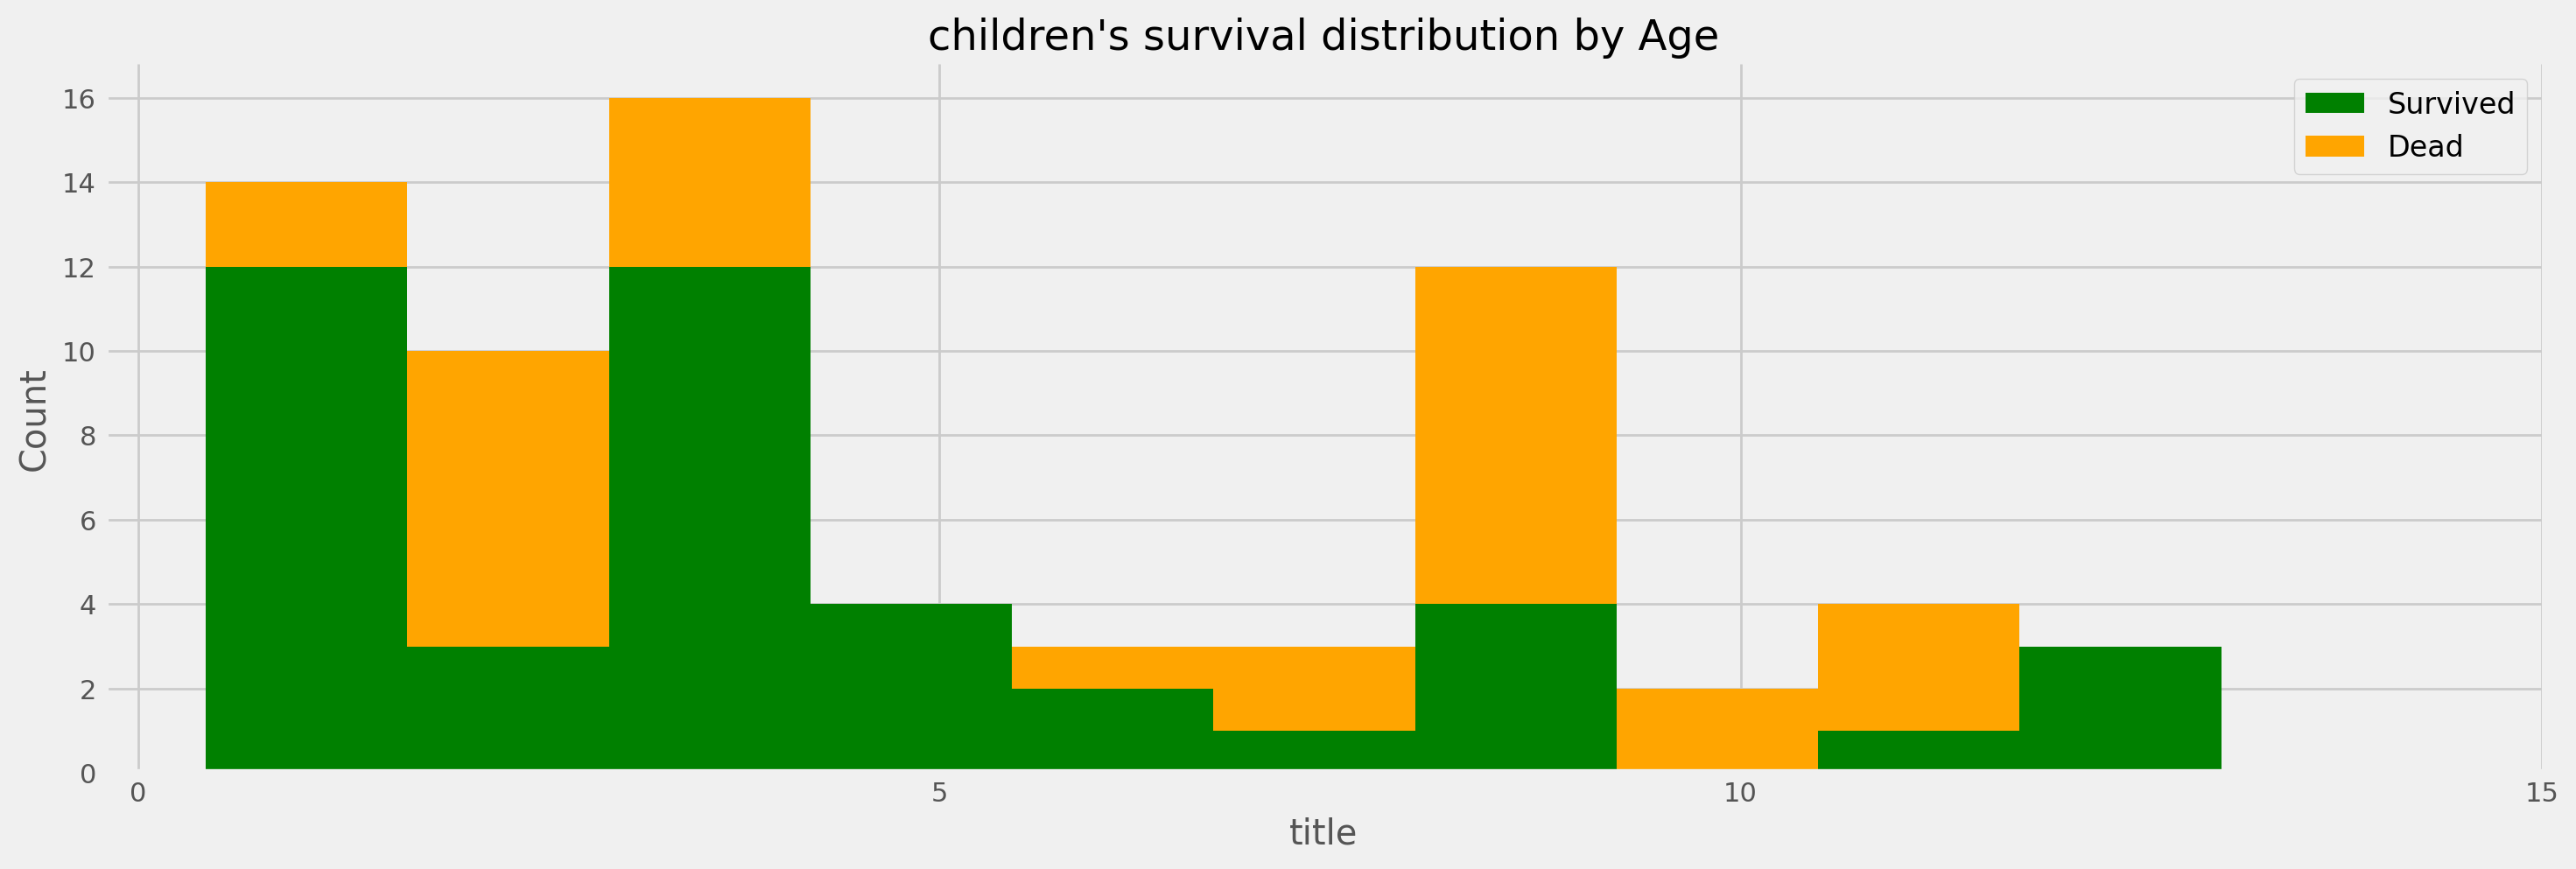

In [134]:
#histogram03: Children's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'child')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'child')]['Age']

plt.hist([survived_women,deceased_women], bins=10, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("children's survival distribution by Age")
plt.xticks(range(0,20,5))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()

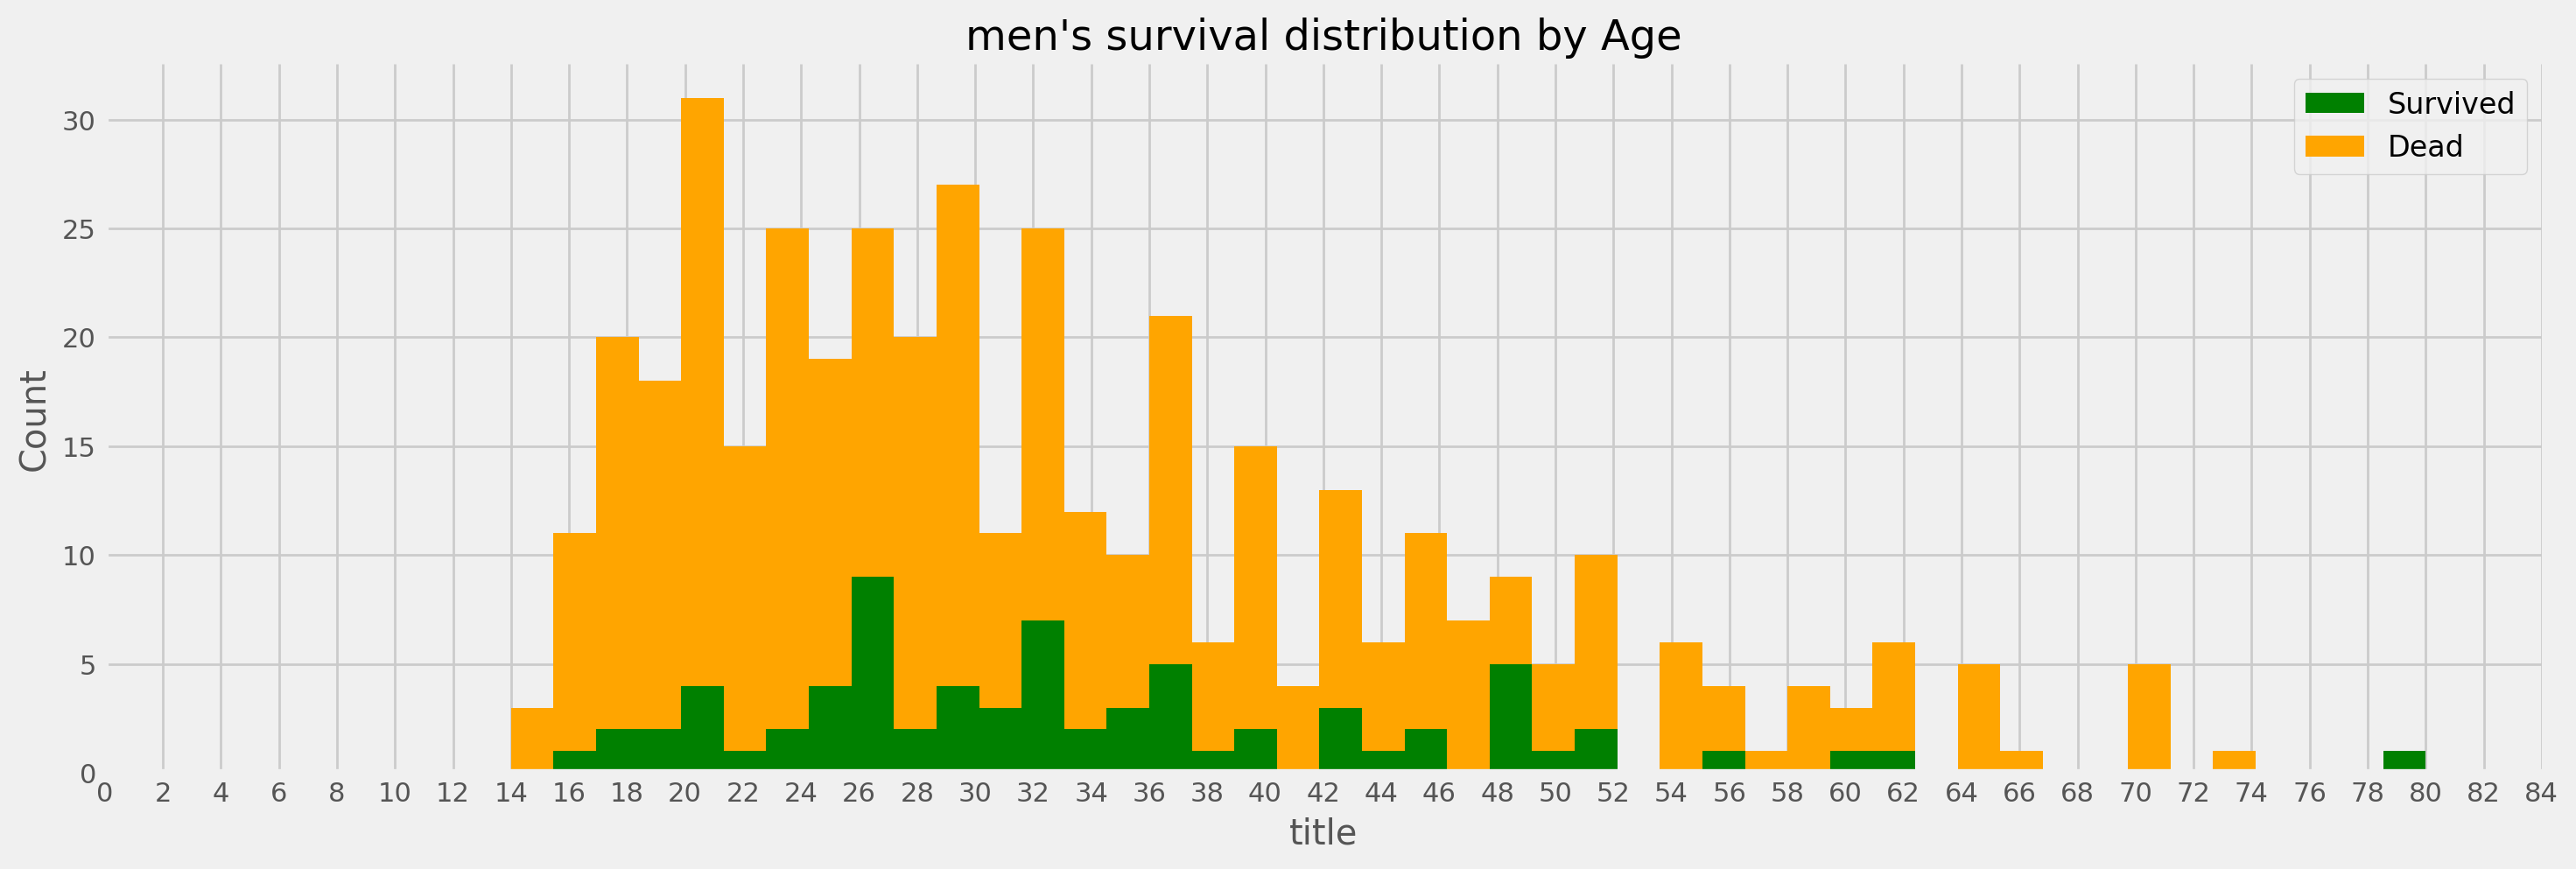

In [139]:
#histogram04: men's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'non_priority')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'non_priority')]['Age']

plt.hist([survived_women,deceased_women], bins=45, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("men's survival distribution by Age")
plt.xticks(range(0,86,2))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()

In [142]:
inscope_df[(inscope_df['Title']=='child')&(inscope_df['Age']==5)].sort_values(by='Age',ascending=True).head(49)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title
58,59,2,"West, Miss. Constance Mirium",female,5.00,1,2,1,child
233,234,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,1,child
448,449,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,1,child
777,778,3,"Emanuel, Miss. Virginia Ethel",female,5.00,0,0,1,child


## Conclusion
Chapter 3 predominantly focuses on refining the dataset by feature engineering, categorizing passengers based on titles and age groups, and exploring survival rates across these defined categories. This groundwork sets the stage for a more detailed analysis in subsequent chapters, allowing for deeper insights into the survival dynamics of distinct passenger groups aboard the Titanic.

---

# 4


# Chapter 4: Data Analysis

## Introduction

The section delves into exploring various passenger categories, survival proportions, and their implications regarding adherence to the "women and children first" principle during the Titanic disaster.

 
 

## Exploring `passenger Titles`


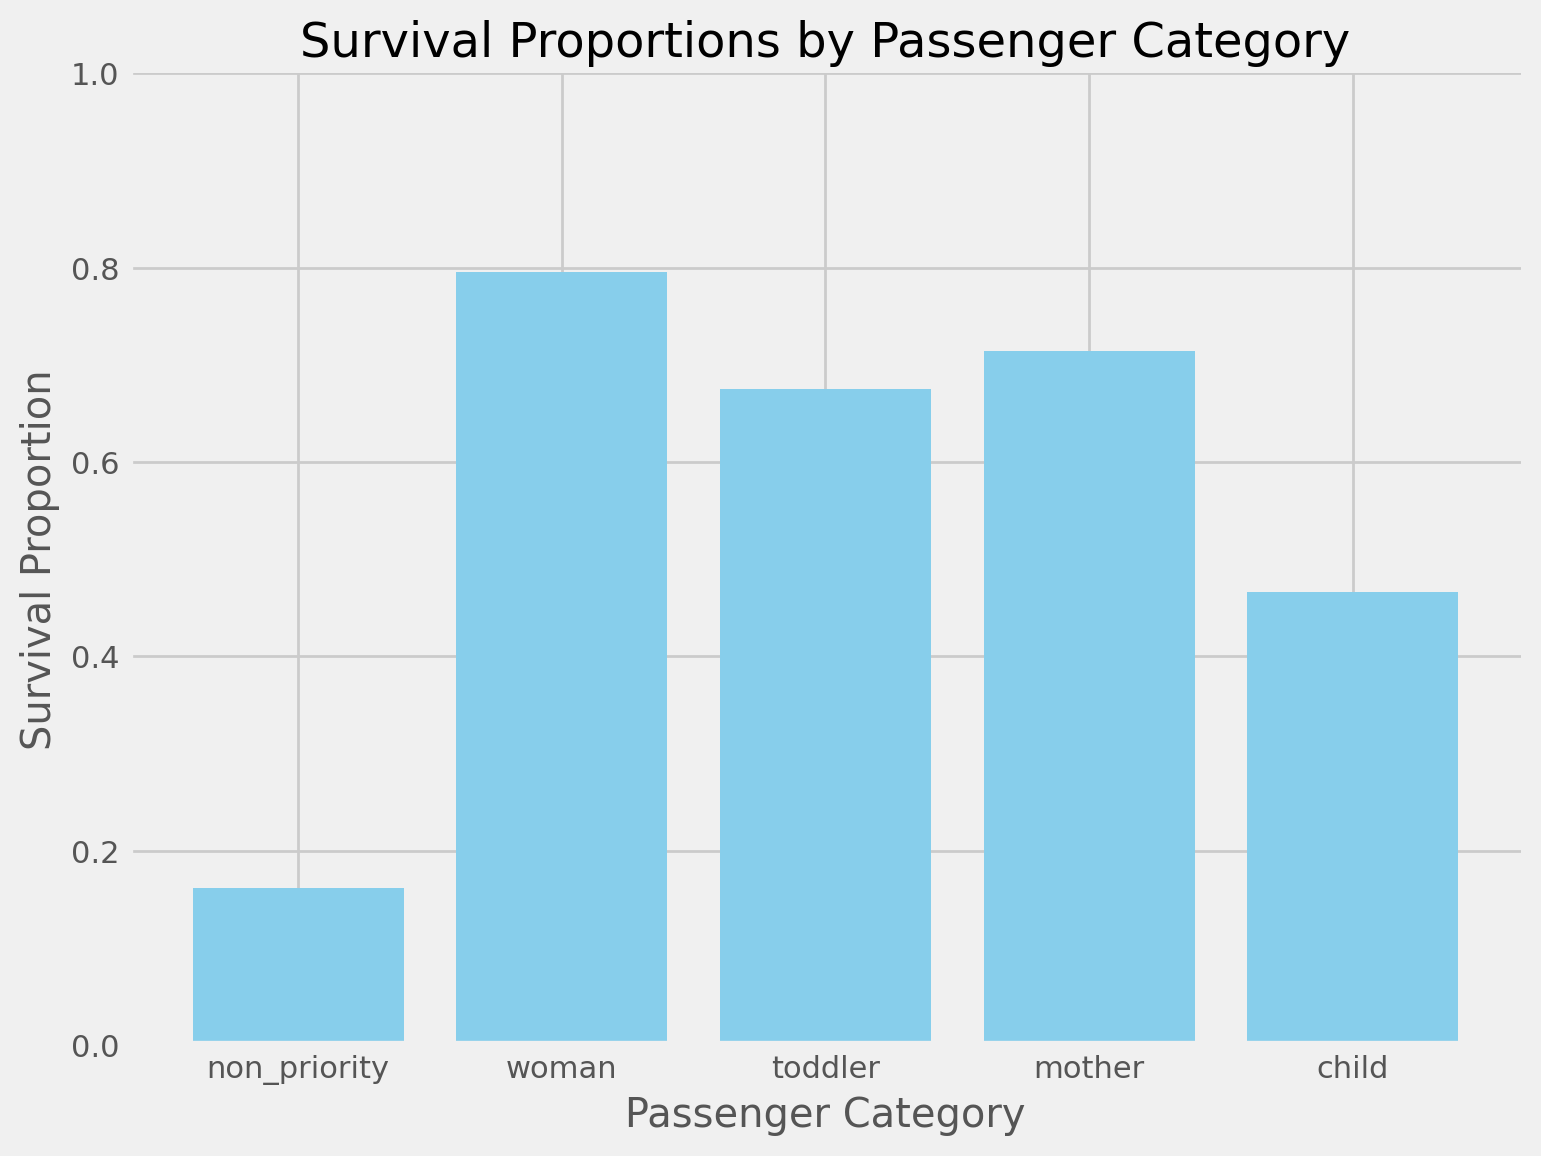

In [91]:

# Create a copy of the DataFrame to work with
inscope_df_copy = inscope_df.copy()

# Calculate survival proportions for each title category
survival_proportions = []

title_categories = ['non_priority', 'woman', 'toddler', 'mother', 'child']

for title in title_categories:
    total_passengers = len(inscope_df_copy[inscope_df_copy['Title'] == title])
    survived_passengers = len(inscope_df_copy[(inscope_df_copy['Title'] == title) & (inscope_df_copy['Survived'] == 1)])
    survival_proportion = survived_passengers / total_passengers if total_passengers != 0 else 0
    survival_proportions.append(survival_proportion)

# Plotting the bar plot for survival proportions
plt.figure(figsize=(8, 6))
plt.bar(title_categories, survival_proportions, color='skyblue')
plt.title('Survival Proportions by Passenger Category')
plt.xlabel('Passenger Category')
plt.ylabel('Survival Proportion')
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1 for proportion
plt.show()


### Observations

- **Non-Priority:** Exhibits the lowest survival proportion (~0.19) among defined categories, indicating a substantially lower likelihood of survival.
- **Woman:** Shows the highest survival proportion (~0.8), signifying a significantly higher likelihood of survival.
- **Mother/Toddler:** Displays intermediate survival proportions (~0.5), suggesting a moderate likelihood of survival compared to other categories.
- **Child:** Demonstrates a survival proportion of about 0.42, signifying a relatively lower likelihood of survival than women.

These survival proportion disparities underscore adherence to the "women and children first" principle, indicating notably higher survival rates among women, mothers, toddlers, and children compared to non-priority passengers. This initial analysis supports the hypothesis that certain passenger categories were prioritized during the evacuation process.

### Children Ages

- **Toddlers (Age < 5):** Show a notably higher survival rate compared to children aged 5 to 14.
- **Children (Age 5-14):** Exhibit relatively lower survival rates compared to toddlers, suggesting potential differentiation in evacuation prioritization based on age within the children group.

This observation highlights a significant disparity in survival rates between toddlers and older children, potentially indicating a more pronounced adherence to prioritizing younger passengers, specifically toddlers, in accordance with the "women and children first" principle.


---

## Consolidating Passenger Categories: "Women and Children" for Enhanced Analysis
 

 

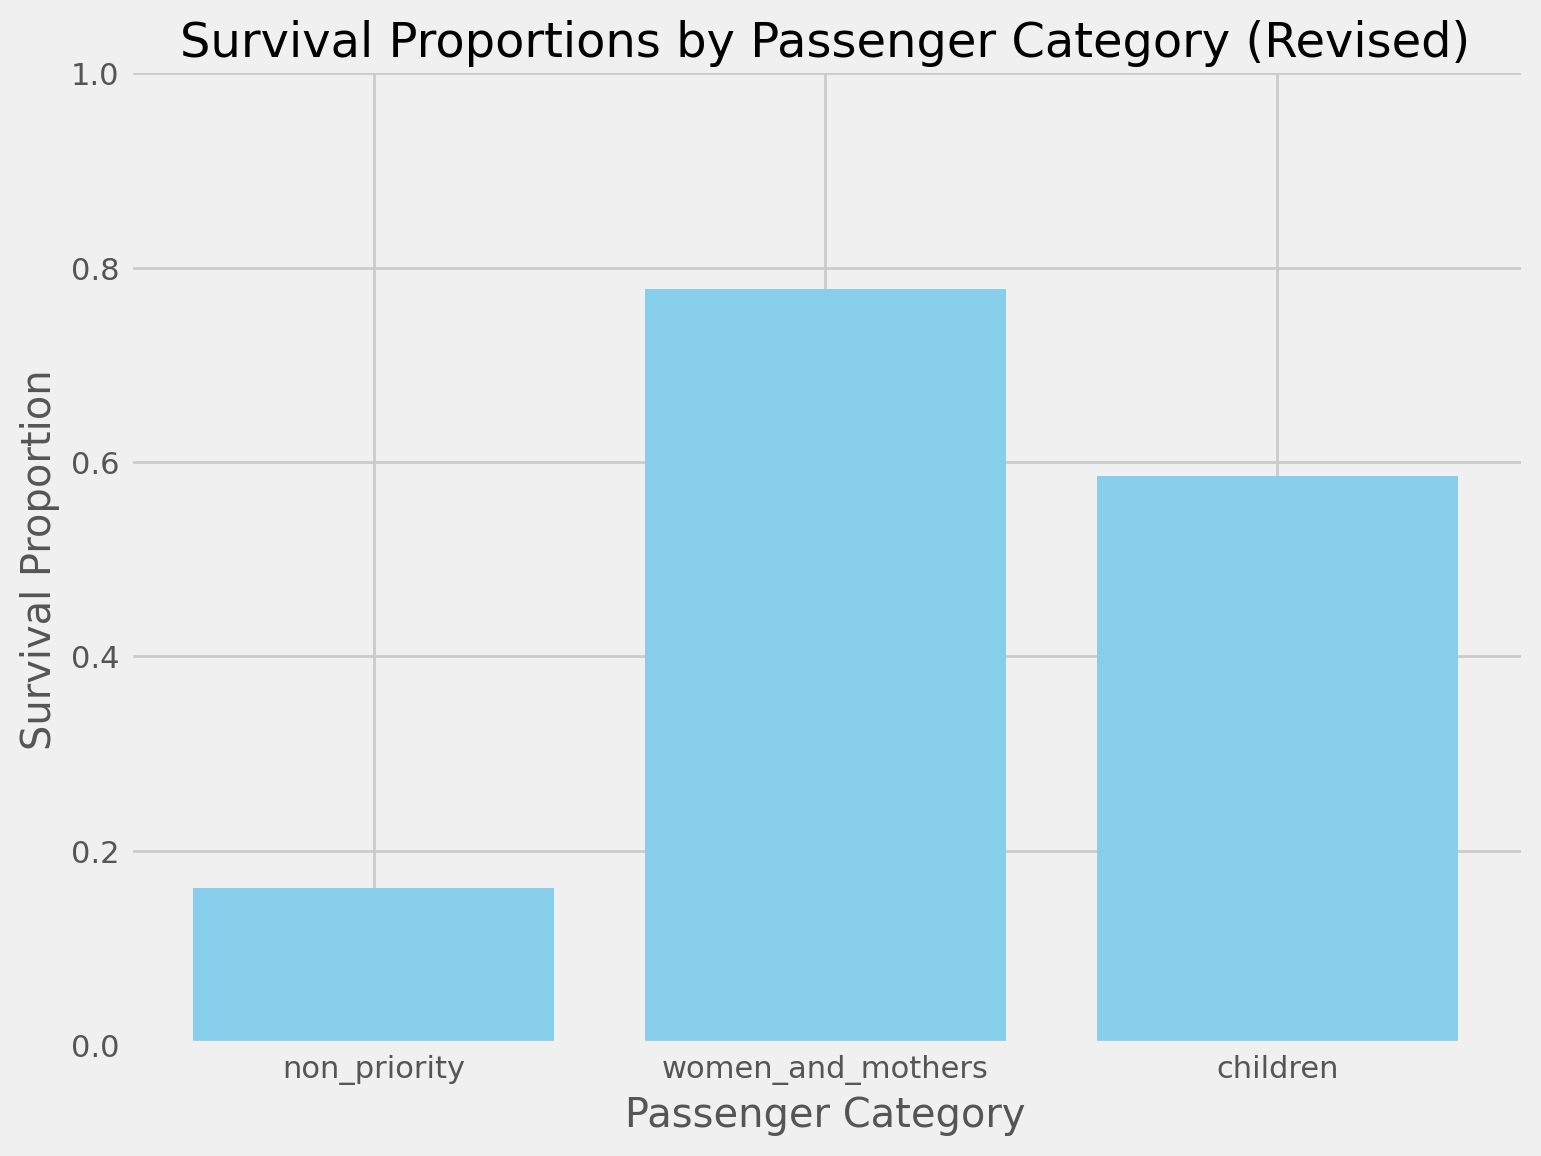

In [93]:
# Create a copy of the DataFrame to work with
new_df = inscope_df.copy()

# Combine 'women' and 'mothers' categories into a broader 'women_and_mothers' category
new_df.loc[new_df['Title'].isin(['woman', 'mother']), 'Title'] = 'women_and_mothers'

# Combine 'toddler' and 'child' categories into a broader 'children' category
new_df.loc[new_df['Title'].isin(['toddler', 'child']), 'Title'] = 'children'

# Calculate survival proportions for each revised title category
survival_proportions_combined = []

combined_categories = ['non_priority', 'women_and_mothers', 'children']

# Loop through each revised category and calculate survival proportions
for title in combined_categories:
    
        # Count total passengers in the current revised category
    total_passengers = len(new_df[new_df['Title'] == title])
    
        # Count passengers who survived within the current revised category
    survived_passengers = len(new_df[(new_df['Title'] == title) & (new_df['Survived'] == 1)])
    
        # Calculate survival proportion for the current category and append to the list
    survival_proportion = survived_passengers / total_passengers if total_passengers != 0 else 0
    survival_proportions_combined.append(survival_proportion)

# Plotting the bar plot for survival proportions after combining categories
plt.figure(figsize=(8, 6))
plt.bar(combined_categories, survival_proportions_combined, color='skyblue')
plt.title('Survival Proportions by Passenger Category (Revised)')
plt.xlabel('Passenger Category')
plt.ylabel('Survival Proportion')
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1 for proportion
plt.show()


---

### Observations After Consolidation

- **Non-Priority Category (Others):** Exhibits notably lower survival rates (~0.19) compared to other groups.
- **Women and Mothers Category:** Demonstrates notably higher survival rates (~0.79), aligning with the "women and children first" principle.
- **Children and Toddlers Category:** Displays a moderate survival rate (~0.59), suggesting a level of prioritization during evacuation, though not as pronounced as for women and mothers.

### Tentative Findings & Potential Insights

The exploration tentatively aligns with historical perceptions, indicating adherence to the "women and children first" principle during the Titanic disaster. Higher survival rates among certain categories suggest a potential priority given to these groups, reflecting prevalent societal norms of that era.

---


## Quantitative Validation of Evacuation Prioritization


In [102]:
new_df['Title'].value_counts()

Title
non_priority         537
women_and_mothers    266
children              70
Name: count, dtype: int64

In [103]:
inscope_df['Title'].value_counts()

Title
non_priority    537
woman           210
mother           56
toddler          40
child            30
Name: count, dtype: int64

In [118]:
 new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  873 non-null    int64  
 1   Pclass       873 non-null    int64  
 2   Name         873 non-null    object 
 3   Sex          873 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        873 non-null    int64  
 6   Parch        873 non-null    int64  
 7   Survived     873 non-null    int64  
 8   Title        873 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 100.5+ KB


In [163]:
new_df.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,0,non_priority
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,1,women_and_mothers
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,1,women_and_mothers
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,1,women_and_mothers
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,0,non_priority
5,6,3,"Moran, Mr. James",male,NaN,0,0,0,non_priority
6,7,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,0,non_priority
7,8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,0,children
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,1,women_and_mothers
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,1,women_and_mothers


In [188]:
import statsmodels.api as sm
import pandas as pd

# Make a copy of the DataFrame
new_dfhot = new_df.copy().dropna()

# Perform one-hot encoding for 'Sex' and 'Title' variables
encoded_sex = pd.get_dummies(new_dfhot['Sex'], prefix='Sex', dtype=int)
encoded_title = pd.get_dummies(new_dfhot['Title'], prefix='Title',dtype=int)
print(encoded_sex)


# Select and drop one column from each encoded set to set as reference levels
# Choosing 'Sex_male' as reference for 'Sex'
encoded_sex = encoded_sex.drop(columns=['Sex_male'])
# encoded_age = new_dfhot['Age']
new_dfhot
# print('aaaaaaaaaaaaa')
print(new_dfhot.isnull().sum())
# new_dfhot['Age']=new_dfhot['Age'].astype(int)
# new_dfhot.info()


# Choosing 'Title_non_priority' as reference for 'Title'
encoded_title = encoded_title.drop(columns=['Title_non_priority'])

# Combine the encoded columns with the original dataframe
new_dfhot = pd.concat([new_dfhot, encoded_sex, encoded_title], axis=1)

# Define the predictor variables (encoded columns) and the response variable (Survived)
predictors =encoded_title.columns.tolist()  # List of predictor variables
response = 'Survived'
print(predictors)
print(encoded_sex.columns.tolist())
print(encoded_title.columns.tolist())

# Fit logistic regression model
model = sm.Logit(new_dfhot[response], sm.add_constant(new_dfhot[predictors]))
result = model.fit()

# Display regression summary
print(result.summary())


     Sex_female  Sex_male
0             0         1
1             1         0
2             1         0
3             1         0
4             0         1
..          ...       ...
885           1         0
886           0         1
887           1         0
889           0         1
890           0         1

[714 rows x 2 columns]
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Survived       0
Title          0
dtype: int64
['Title_children', 'Title_women_and_mothers']
['Sex_female']
['Title_children', 'Title_women_and_mothers']
Optimization terminated successfully.
         Current function value: 0.506771
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:   

In [191]:
# Create a copy of the DataFrame
new_df_combined = new_df.copy()

# Combine 'women_and_mothers' and 'children' into one category 'women_and_children'
new_df_combined['Combined_Title'] = new_df_combined['Title'].map(lambda x: 1 if x in ['women_and_mothers', 'children'] else 0)

# Displaying the first few rows to check the new column
print(new_df_combined[['Title', 'Combined_Title']].head(20))

# Define the predictor variables (encoded columns) and the response variable (Survived)
predictors =['Combined_Title']  # List of predictor variables
response = 'Survived'
print(predictors)

# Fit logistic regression model
model = sm.Logit(new_df_combined[response], sm.add_constant(new_df_combined[predictors]))
result = model.fit()

# Display regression summary
print(result.summary())



                Title  Combined_Title
0        non_priority               0
1   women_and_mothers               1
2   women_and_mothers               1
3   women_and_mothers               1
4        non_priority               0
5        non_priority               0
6        non_priority               0
7            children               1
8   women_and_mothers               1
9   women_and_mothers               1
10           children               1
11  women_and_mothers               1
12       non_priority               0
13       non_priority               0
14  women_and_mothers               1
15  women_and_mothers               1
16           children               1
17       non_priority               0
18  women_and_mothers               1
19  women_and_mothers               1
['Combined_Title']
Optimization terminated successfully.
         Current function value: 0.493813
         Iterations 6
                           Logit Regression Results                           
De

 
 
### Regression Summary

The logistic regression model showcases distinctive coefficients associated with different passenger categories, emphasizing the substantial impact of being categorized as part of the combined women and children group on the likelihood of survival compared to other categories.

---


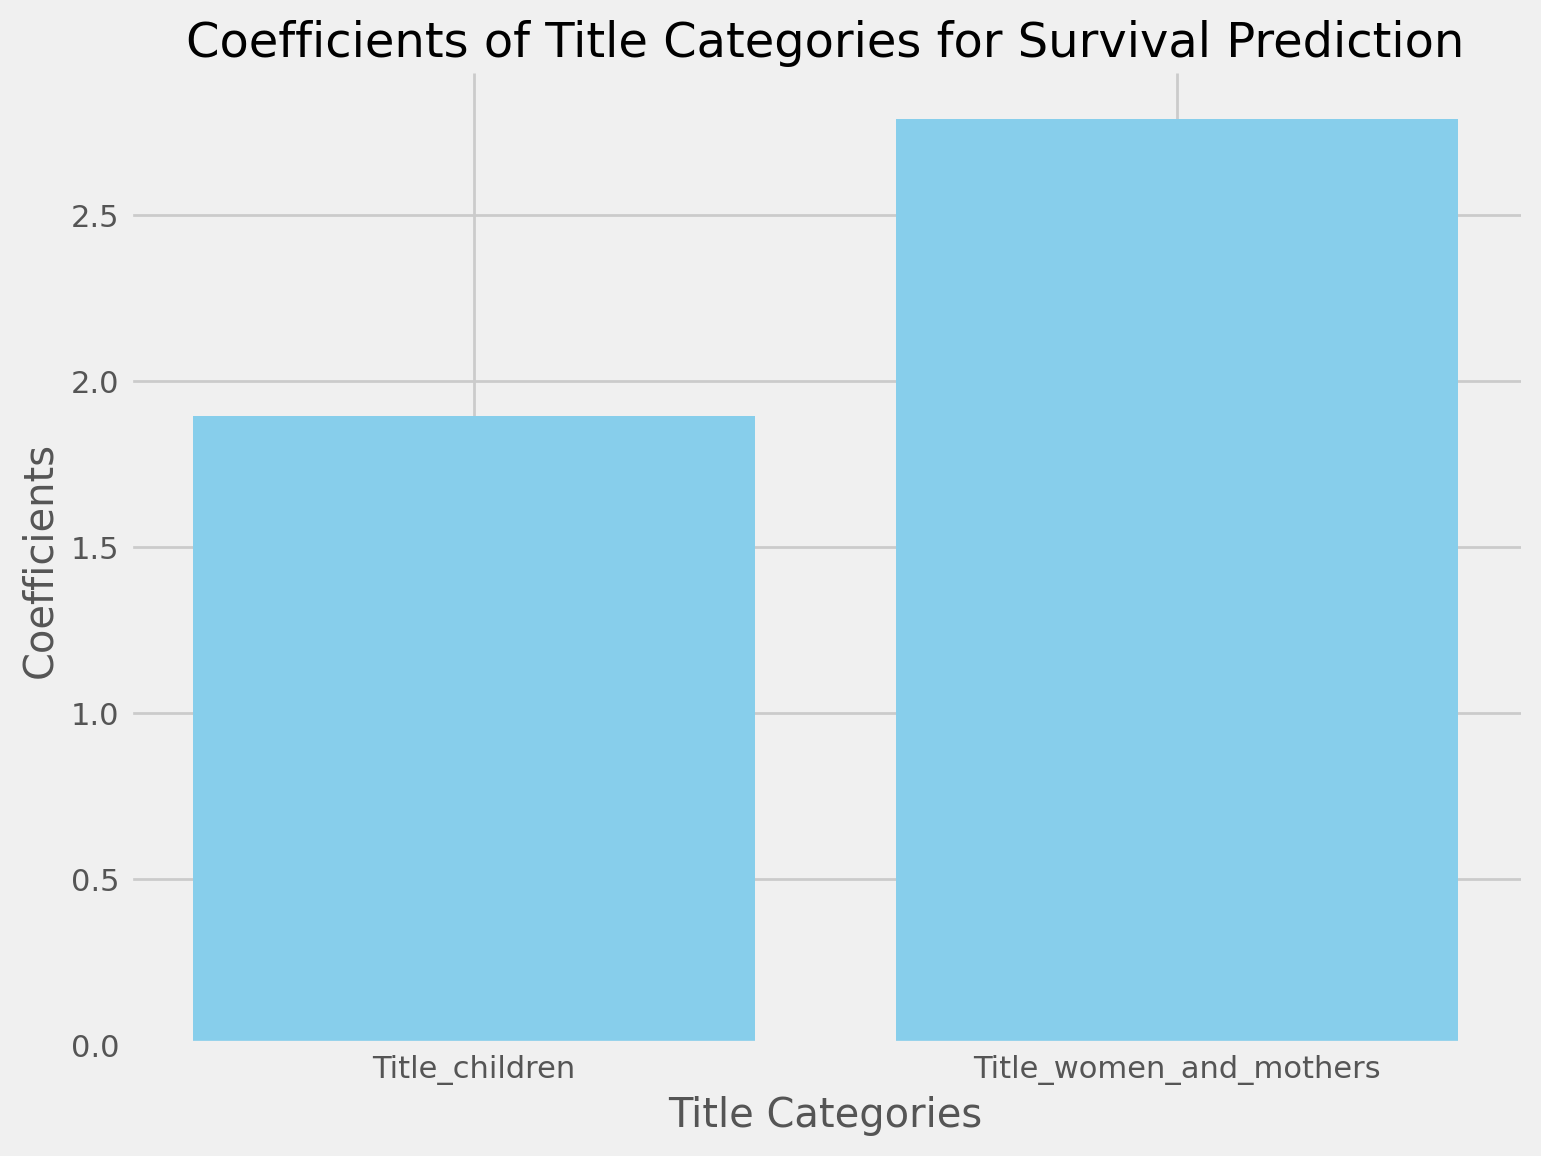

In [186]:

# Coefficients from the logistic regression model
coefficients = [1.8965, 2.7888]  # Update with your actual coefficients

# Labels for each category
labels = ['Title_children', 'Title_women_and_mothers']  # Update with your category names

# Plotting the coefficients
plt.figure(figsize=(8, 6))
plt.bar(labels, coefficients, color='skyblue')
plt.title('Coefficients of Title Categories for Survival Prediction')
plt.xlabel('Title Categories')
plt.ylabel('Coefficients')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Adding a reference line at 0
plt.show()


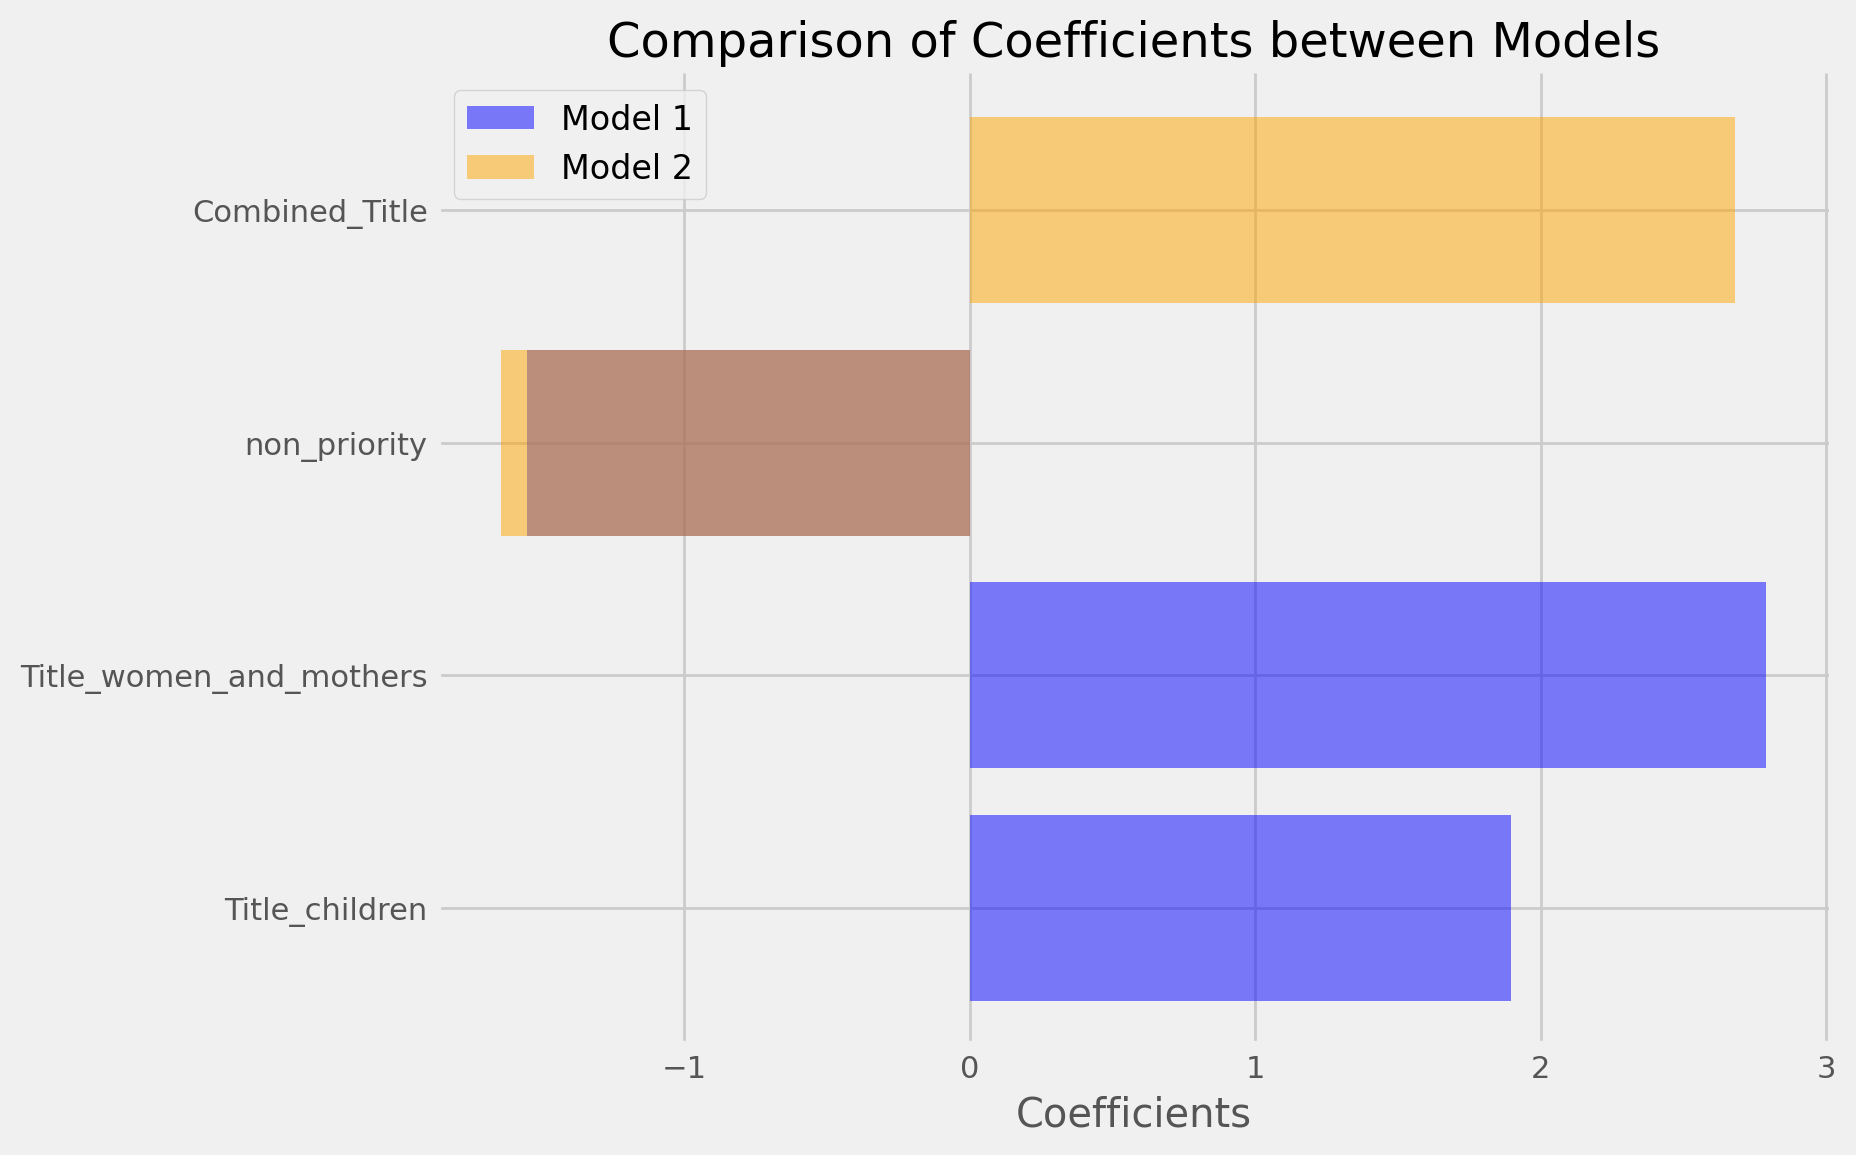

In [196]:

# Coefficients for the first model
coef_1 = {'Title_children': 1.8965, 'Title_women_and_mothers': 2.7888, 'non_priority': -1.5502}

# Coefficients for the second model
coef_2 = {'Combined_Title': 2.6794, 'non_priority': -1.6433}

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting coefficients from the first model
for i, (category, coef) in enumerate(coef_1.items()):
    ax.barh(category, coef, color='blue', alpha=0.5, label='Model 1' if i == 0 else '')

# Plotting coefficient from the second model
for i, (category, coef) in enumerate(coef_2.items()):
    ax.barh(category, coef, color='orange', alpha=0.5, label='Model 2' if i == 0 else '')

ax.set_xlabel('Coefficients')
ax.set_title('Comparison of Coefficients between Models')
ax.legend()
plt.show()


 
## Results Explanation:
The logistic regression results reveal distinctive coefficients associated with different title categories. In the first model focusing on `Title_children` and `Title_women_and_mothers`, the coefficients are 1.8965 and 2.7888, respectively. These coefficients represent the impact of being categorized as a child or a woman/mother on the likelihood of survival concerning the reference category.

The second model emphasizes a combined category, `Combined_Title`, against `non_priority`. The coefficient of 2.6794 for the  `Combined_Title` in the logistic regression model indicates a substantial impact on the likelihood of survival when categorized as part of the combined group encompassing women and children. This coefficient value represents the log-odds ratio between this specific category and the reference category, `non-priority`. A higher coefficient signifies a significantly higher probability of survival for individuals belonging to the combined category compared to those categorized as `non-priority` passengers.

## Conclusion:
The analysis demonstrates a considerable disparity in survival likelihood among different groups. Specifically, being identified as part of the combined category of women and children significantly increases the chances of survival compared to individuals categorized differently, such as non-priority. Moreover, the results underscore the importance of considering demographic categories in understanding survival rates among passengers during the studied event.

These findings highlight the significance of the categorization used in the study. They strongly suggest that women and children had notably higher survival probabilities compared to other passenger categories, particularly non-priority individuals. This insight adds valuable context to our understanding of the factors influencing survival rates and contributes to the broader study of survival dynamics in such scenarios.

--- 

# 5


 

# Chapter 5: Conclusion

The analysis concentrated on demographic categories, particularly women and children, revealing compelling insights into survival rates within these groups aboard the Titanic. The findings emphasize the significantly higher survival rates of the combined category of women and children compared to non-priority individuals. Further segmentation within this group highlighted the notably elevated survival rates of women and mothers, followed by children and toddlers.

## Insights

#### Higher Survival Rates for Women and Mothers:

- **Priority to Women and Mothers:** The women and mothers, as part of the women and children category, exhibited markedly higher survival rates compared to other groups, highlighting the priority accorded to this category during the crisis.

#### Distinct Survival Rates among Age Groups:

- **Variations in Age-Based Priorities:** Within the combined category, different age groups showed varying survival rates, notably higher among women and mothers compared to toddlers and children. This suggests potential differences in prioritization based on age distinctions within the demographic category.

## Suggestions

#### Enhanced Focus on Maternal Care:

- **Importance of Maternal Support:** Understanding the higher survival rates among women and mothers could prompt further studies or policies focusing on maternal care and support during emergencies or disasters.

#### Refinement in Age-Based Prioritization:

- **Reevaluating Age-Based Priorities:** Exploring the distinct survival rates among different age groups within women and children might lead to a reevaluation of age-based priorities during rescue operations.

## Possible Next Steps

#### Incorporating Socioeconomic Factors:

- **Analyzing Socioeconomic Influences:** Integrating socioeconomic parameters could shed light on how various factors influence survival within the women and children category.

#### Machine Learning Predictive Models:

- **Predictive Insights:** Utilizing machine learning algorithms can predict survival probabilities and provide deeper insights into the nuanced factors affecting survival among different demographic groups.

#### Temporal Analysis:

- **Understanding Evolving Priorities:** Exploring survival trends over time or during specific phases of the disaster could provide insight into changing priorities or policies during critical moments.

These suggested avenues for further investigation hold the potential to enrich the depth and breadth of the analysis, offering additional insights into the survival dynamics of vulnerable groups during exigencies.

---

